# 数据集：Oakland Crime Statistics 2011 to 2016

### 首先，将文件存入数组中，便于后续处理：

In [41]:
import os

def file_filter(f):
        if f[-4:] in ['.csv']:
            return True
        else:
            return False

def get_file_list(dir_):
    lists = os.listdir(dir_)
    lists = list(filter(file_filter, lists))
    return lists

file_path_arr = get_file_list(os.path.abspath(os.curdir))
print(file_path_arr)

['records-for-2011.csv', 'records-for-2012.csv', 'records-for-2013.csv', 'records-for-2014.csv', 'records-for-2015.csv', 'records-for-2016.csv']


### 查看数据的属性：

In [140]:
import pandas as pd
import numpy as np

whole_data = []
for current_file in file_path_arr:
        whole_data.append(pd.read_csv(current_file, low_memory=False))
print(whole_data[0].dtypes)

attributes = whole_data[0].columns
attributes = np.array(attributes, dtype=object)
print(attributes)

Agency                        object
Create Time                   object
Location                      object
Area Id                      float64
Beat                          object
Priority                       int64
Incident Type Id              object
Incident Type Description     object
Event Number                  object
Closed Time                   object
dtype: object
['Agency' 'Create Time' 'Location' 'Area Id' 'Beat' 'Priority'
 'Incident Type Id' 'Incident Type Description' 'Event Number'
 'Closed Time']


#### 该数据集包括10个数据属性，分别为：
['Agency', 'Create Time', 'Location', 'Area Id', 'Beat', 'Priority', 'Incident Type Id', 'Incident Type Description', 'Event Number', 'Closed Time']

Agency：代理名称，为标称属性，含缺失值；

Create Time：案件的创建时间，为标称属性，含缺失值；

Location：案件的发生地点，为标称属性，含缺失值；

Area Id：发生案件的地区ID，为标称属性，含缺失值；

Beat：发生案件的巡逻区，为标称属性，含缺失值；

Priority：案件的优先级，为标称属性，含缺失值；

Incident Type Id：案件的类型ID，为标称属性，含缺失值；

Incident Type Description：案件的类型，为标称属性，含缺失值；

Event Number：案件的标识，为标称属性，含缺失值；

Closed Time：案件的结束时间，为标称属性，含缺失值；

### 1.Agency属性的处理，为标称属性。
查看kaggle页面可见本属性有缺失值，所以需要对缺失值进行观察，输出频数：

In [5]:
import matplotlib.pyplot as plt

for file_index in range(len(file_path_arr)):
        print("current file name: ", file_path_arr[file_index])
        current_data = whole_data[file_index]
        bin_data = current_data[attributes[0]].value_counts(dropna = False)
        print(bin_data)

current file name:  records-for-2014.csv
OP    187480
Name: Agency, dtype: int64
current file name:  records-for-2015.csv
OP    192581
Name: Agency, dtype: int64
current file name:  records-for-2011.csv
OP    180015
Name: Agency, dtype: int64
current file name:  records-for-2012.csv
OP    187430
Name: Agency, dtype: int64
current file name:  records-for-2013.csv
OP    188051
Name: Agency, dtype: int64
current file name:  records-for-2016.csv
OP    110827
Name: Agency, dtype: int64


In [68]:
def get_data_from_attributes(attribute, prefix = ""):
    data = []
    for current_file in file_path_arr:
        current_data = pd.read_csv(prefix + current_file, keep_default_na=False, low_memory=False)
        data.append(current_data[attribute])
    data = np.array(data, dtype=object)
    return data

def check_nan(origin_data, nan):
    nan_count_by_year = []
    for current_year in origin_data:
        count = 0
        for value in current_year:
            if value == nan:
                count += 1
        nan_count_by_year.append(count)
    return nan_count_by_year

origin_agency = get_data_from_attributes(attributes[0])
nan_count_by_year = check_nan(origin_agency, "")
print(nan_count_by_year)

[0, 0, 0, 0, 0, 0]


可以看到，从2011、2012、2013、2016年的Agency属性分别有一个缺失值为""，需要观察该缺失值所在的行其余数据是否有缺失。

In [72]:
def get_row_index(file, attribute, nan):
    data = pd.read_csv(file, keep_default_na=False, low_memory=False)
    nan_index_arr = []
    nan_row_value_arr = []
    for i in range(data.shape[0]):
        if data.loc[i, attribute] == nan:
            nan_index_arr.append(i)
            nan_row_value_arr.append(data.loc[i].values)
    return nan_index_arr, nan_row_value_arr

In [91]:
for current_file in file_path_arr:
    print("current file name: " + current_file)
    _nan_index_arr, _nan_row_value_arr = get_row_index(current_file, attributes[0], '')
    if _nan_index_arr != []:
        print("空值所在行索引：", _nan_index_arr)
        print("空值所在行值：", _nan_row_value_arr)
    else:
        print(attributes[0], "不存在空值")

current file name: records-for-2011.csv
空值所在行索引： [180015]
空值所在行值： [array(['', '', '   ', '', '', '', '', '', '', ''], dtype=object)]
current file name: records-for-2012.csv
空值所在行索引： [187255]
空值所在行值： [array(['', '', '', '', '', '', '', '', '', '', ''], dtype=object)]
current file name: records-for-2013.csv
空值所在行索引： [188051]
空值所在行值： [array(['', '', '      ', '', '', '', '', '', '', ''], dtype=object)]
current file name: records-for-2014.csv
Agency 不存在空值
current file name: records-for-2015.csv
Agency 不存在空值
current file name: records-for-2016.csv
空值所在行索引： [110827]
空值所在行值： [array(['', '', '      ', '', '', '', '', '', '', ''], dtype=object)]


通过观察可以发现，Agency属性为空值的行其余的属性值也为空，说明这行数据本身可能是人为误操作导致的，因此将缺失部分剔除即可，不同年份数据删除空值前后对比图如下：

current file name:  records-for-2011.csv


<AxesSubplot:title={'center':'after'}>

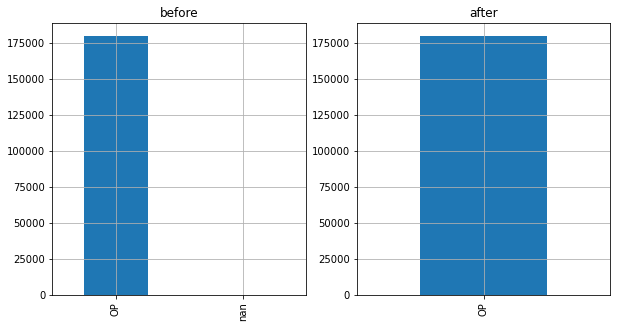

In [19]:
print("current file name: ", file_path_arr[0])
current_data = whole_data[0]
attribute = attributes[0]
del_agency = current_data.dropna(subset=[attribute])
plt.subplot(1,2,1) 
current_data[attribute].value_counts(dropna = False).plot(kind='bar',figsize=(10,5), grid=True, title="before")
plt.subplot(1,2,2) 
del_agency[attribute].value_counts(dropna = False).plot(kind='bar', grid=True, title="after")


current file name:  records-for-2012.csv


<AxesSubplot:title={'center':'after'}>

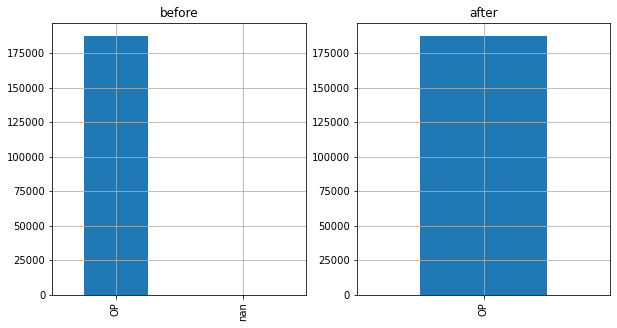

In [20]:
print("current file name: ", file_path_arr[1])
current_data = whole_data[1]
attribute = attributes[0]
del_agency = current_data.dropna(subset=[attribute])
plt.subplot(1,2,1) 
current_data[attribute].value_counts(dropna = False).plot(kind='bar',figsize=(10,5), grid=True, title="before")
plt.subplot(1,2,2) 
del_agency[attribute].value_counts(dropna = False).plot(kind='bar', grid=True, title="after")

current file name:  records-for-2013.csv


<AxesSubplot:title={'center':'after'}>

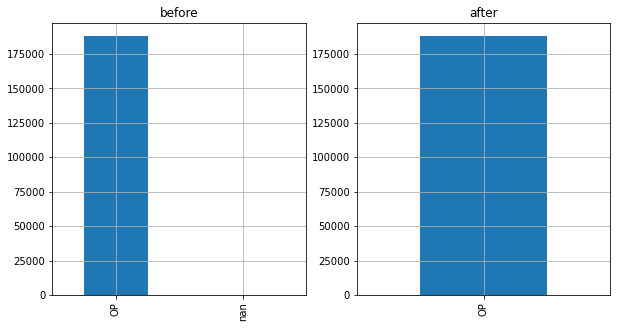

In [21]:
print("current file name: ", file_path_arr[2])
current_data = whole_data[2]
attribute = attributes[0]
del_agency = current_data.dropna(subset=[attribute])
plt.subplot(1,2,1) 
current_data[attribute].value_counts(dropna = False).plot(kind='bar',figsize=(10,5), grid=True, title="before")
plt.subplot(1,2,2) 
del_agency[attribute].value_counts(dropna = False).plot(kind='bar', grid=True, title="after")

current file name:  records-for-2016.csv


<AxesSubplot:title={'center':'after'}>

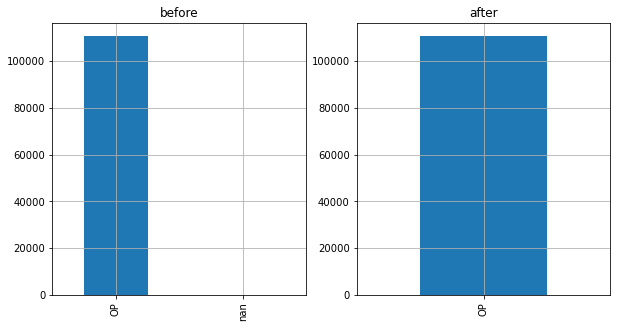

In [22]:
print("current file name: ", file_path_arr[5])
current_data = whole_data[5]
attribute = attributes[0]
del_agency = current_data.dropna(subset=[attribute])
plt.subplot(1,2,1) 
current_data[attribute].value_counts(dropna = False).plot(kind='bar',figsize=(10,5), grid=True, title="before")
plt.subplot(1,2,2) 
del_agency[attribute].value_counts(dropna = False).plot(kind='bar', grid=True, title="after")

### 2.Create Time& Closed Time属性的处理，为标称属性。
查看kaggle页面可见两个和时间相关的属性都有缺失值，时间节点对数据挖掘而言比较重要，不可以直接删除。

同时，我们可以直接观察案件的解决时长信息来对数据进行挖掘。

In [29]:
import datetime

def str_to_datetime(s):
    date, time = s.split('T')
    date = date.split('-')
    time = time[:-4].split(':')
    date = [int(x) for x in date]
    time = [int(x) for x in time]
    return datetime.datetime(date[0],date[1],date[2],time[0],time[1],time[2])

def time_interval(col1,col2):
    start = col1.values
    end = col2.values
    time_spent = []
    for s,e in zip(start,end):
        if s == '' or e == '':
            continue
        else:
            time_spent.append(int((str_to_datetime(e) - str_to_datetime(s)).seconds / 60))
    return time_spent

def get_time():
    during_time_arr = []
    for current_file in file_path_arr:
        print("current file name: ", current_file)
        current_data = pd.read_csv(current_file, keep_default_na=False, low_memory=False)
        time_spent = time_interval(current_data[attributes[1]], current_data[attributes[9]])
        during_time_arr.append(time_spent)
    during_time_arr = np.array(during_time_arr, dtype=object)
    return during_time_arr

during_time_arr = get_time()

current file name:  records-for-2011.csv
current file name:  records-for-2012.csv
current file name:  records-for-2013.csv
current file name:  records-for-2014.csv
current file name:  records-for-2015.csv
current file name:  records-for-2016.csv


In [59]:
def figure_of_time_spent(i):
    current_data = during_time_arr[i]
    print('五数概括：')
    print('Min:', np.min(current_data),end=',')
    print('Q1:', np.percentile(current_data, 25),end=',')
    print('Q2:', np.percentile(current_data, 50),end=',')
    print('Q3:', np.percentile(current_data, 75),end=',')
    print('Max:', np.max(current_data))
    col = np.array(current_data)
    plt.figure(figsize=(10, 3))
    plt.boxplot(col, notch=False, vert=False)
    plt.xlabel('time spent of ' + file_path_arr[i])
    plt.show()
    outlier = np.percentile(col, 75) + (np.percentile(col, 75) - np.percentile(col, 25)) * 1.5
    print("离群点：", outlier)

五数概括：
Min: 0,Q1: 20.0,Q2: 56.0,Q3: 128.0,Max: 1439


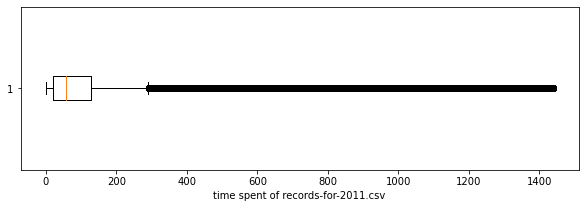

离群点： 290.0


In [60]:
figure_of_time_spent(0)

五数概括：
Min: 0,Q1: 23.0,Q2: 64.0,Q3: 148.0,Max: 1439


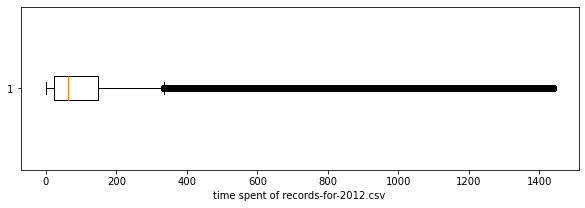

离群点： 335.5


In [61]:
figure_of_time_spent(1)

五数概括：
Min: 0,Q1: 25.0,Q2: 72.0,Q3: 169.0,Max: 1439


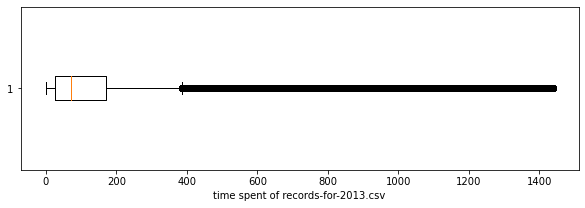

离群点： 385.0


In [62]:
figure_of_time_spent(2)

五数概括：
Min: 0,Q1: 24.0,Q2: 71.0,Q3: 172.0,Max: 1439


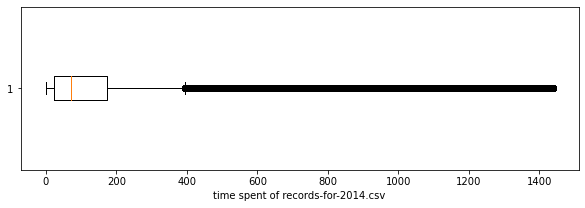

离群点： 394.0


In [63]:
figure_of_time_spent(3)

五数概括：
Min: 0,Q1: 21.0,Q2: 66.0,Q3: 161.0,Max: 1439


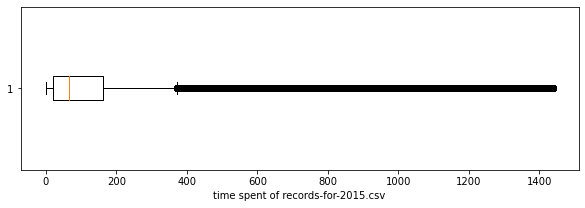

离群点： 371.0


In [64]:
figure_of_time_spent(4)

五数概括：
Min: 0,Q1: 22.0,Q2: 70.0,Q3: 173.0,Max: 1439


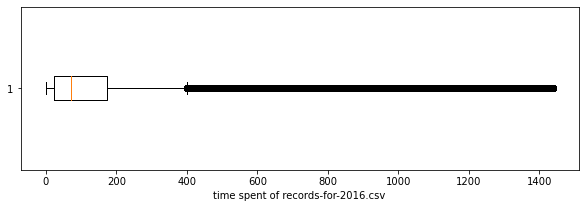

离群点： 399.5


In [65]:
figure_of_time_spent(5)

In [31]:
def frequency_of_time_spent(i):
    current_data = during_time_arr[i]
    col = np.array(current_data)
    plt.figure(figsize=(10, 3))
    plt.xlabel('time spent of ' + file_path_arr[i])
    plt.ylabel("frequency")
    plt.hist(col, bins=40, edgecolor="black")

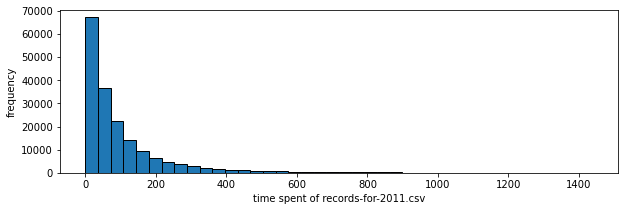

In [32]:
frequency_of_time_spent(0)

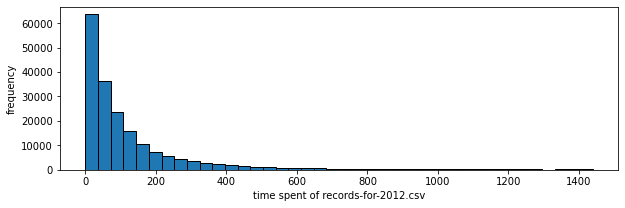

In [80]:
frequency_of_time_spent(1)

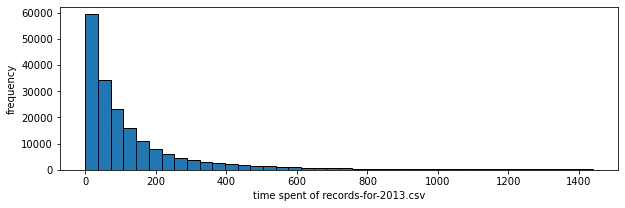

In [81]:
frequency_of_time_spent(2)

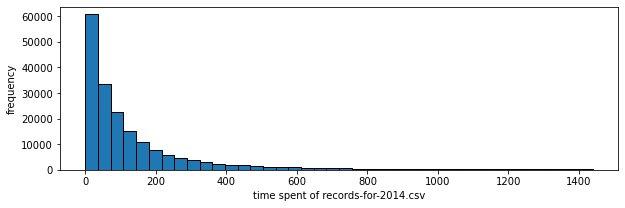

In [82]:
frequency_of_time_spent(3)

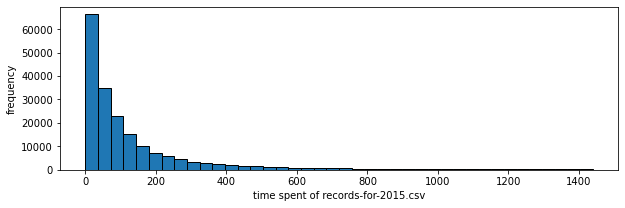

In [83]:
frequency_of_time_spent(4)

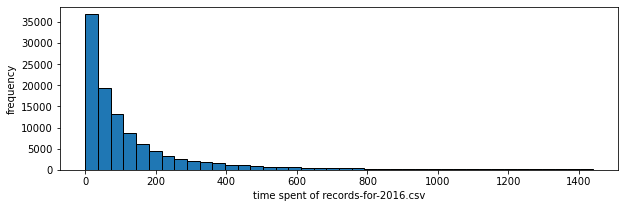

In [84]:
frequency_of_time_spent(5)

针对缺失的时间数据，用最高频率值来填补缺失值：

In [92]:
origin_create_time = get_data_from_attributes(attributes[1])
nan_create_time_by_year = check_nan(origin_create_time, "")
print(nan_create_time_by_year)

[1, 1, 1, 0, 0, 1]


经过对比我们可知，create time属性缺失的即是agency属性缺失的数据，因此我们将空值数据去除后保存。

In [93]:
for current_file in file_path_arr:
    print("current file name: " + current_file)
    _nan_index_arr, _ = get_row_index(current_file, attributes[0], '')
    if _nan_index_arr != []:
        print("空值所在行索引：", _nan_index_arr)
        data = pd.read_csv(current_file, keep_default_na=False, low_memory=False)
        data = data.drop(index=_nan_index_arr)
        data.to_csv(current_file, index=False)
    else:
        print(attributes[0], "不存在空值")


current file name: records-for-2011.csv
空值所在行索引： [180015]
current file name: records-for-2012.csv
空值所在行索引： [187255]
current file name: records-for-2013.csv
空值所在行索引： [188051]
current file name: records-for-2014.csv
Agency 不存在空值
current file name: records-for-2015.csv
Agency 不存在空值
current file name: records-for-2016.csv
空值所在行索引： [110827]


In [94]:
origin_closed_time = get_data_from_attributes(attributes[9])
nan_closed_time_by_year = check_nan(origin_closed_time, "")
print(nan_closed_time_by_year)

[6, 18, 1, 0, 0, 0]


In [96]:
for year in during_time_arr:
    print(pd.value_counts(year))

0       9739
1       5208
2       3334
3       2599
4       1928
        ... 
1147       1
1275       1
1195       1
1066       1
1407       1
Length: 1405, dtype: int64
0       9357
1       5026
2       3240
3       2603
4       1940
        ... 
922        1
1071       1
1131       1
898        1
993        1
Length: 1436, dtype: int64
0       6292
1       4418
2       3331
3       2793
4       2266
        ... 
1367       1
1217       1
1410       1
1403       1
1317       1
Length: 1436, dtype: int64
0       7206
1       4471
2       3451
3       2774
4       2226
        ... 
1103       2
1414       2
1169       2
1346       1
1437       1
Length: 1439, dtype: int64
0       12199
1        4162
2        3152
3        2550
4        2067
        ...  
1396        2
1437        1
1381        1
1222        1
1361        1
Length: 1440, dtype: int64
0       6707
1       2336
2       1954
3       1546
4       1193
        ... 
1309       1
1181       1
1436       1
1308       1
1407     

可以看到，6个年份的最高频数值都为0，因此将0作为补充值加入数组。

In [97]:
for index in range(len(nan_closed_time_by_year)):
    during_time_arr[index] = during_time_arr[index] + nan_closed_time_by_year[index] * [0]

然后，通过直方图对比处理前后的数据（因为只有2011-2013年缺失，因此只关注这三个年份）：

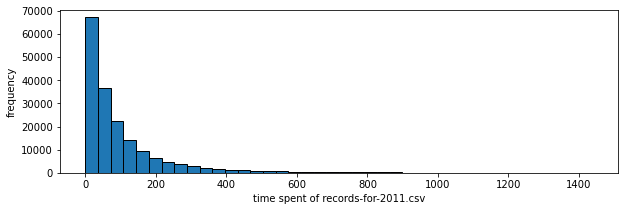

In [98]:
frequency_of_time_spent(0)

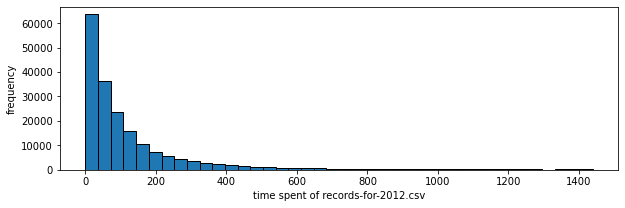

In [99]:
frequency_of_time_spent(1)

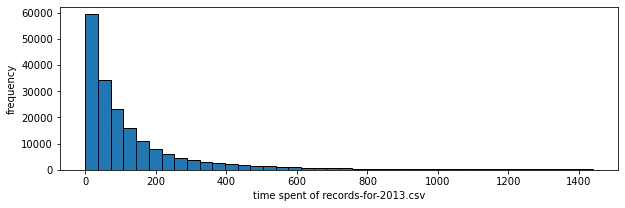

In [100]:
frequency_of_time_spent(2)

### 3.Location& Area Id& Beat的处理，为标称属性。
查看kaggle页面可见这三个与地点有关的属性都有缺失值，所以需要对缺失值进行观察，输出对应的频数：

current file name:  records-for-2011.csv
 INTERNATIONAL BLVD        3866
 MACARTHUR BLVD            3129
 AV&INTERNATIONAL BLVD     3067
 BROADWAY                  2132
 FOOTHILL BLVD             1791
                           ... 
33RD E 17TH ST                1
 - 6400 BLK                   1
73RD PALM AV                  1
21ST EMBARCADERO              1
95TH 2ND AV                   1
Name: Location, Length: 32505, dtype: int64


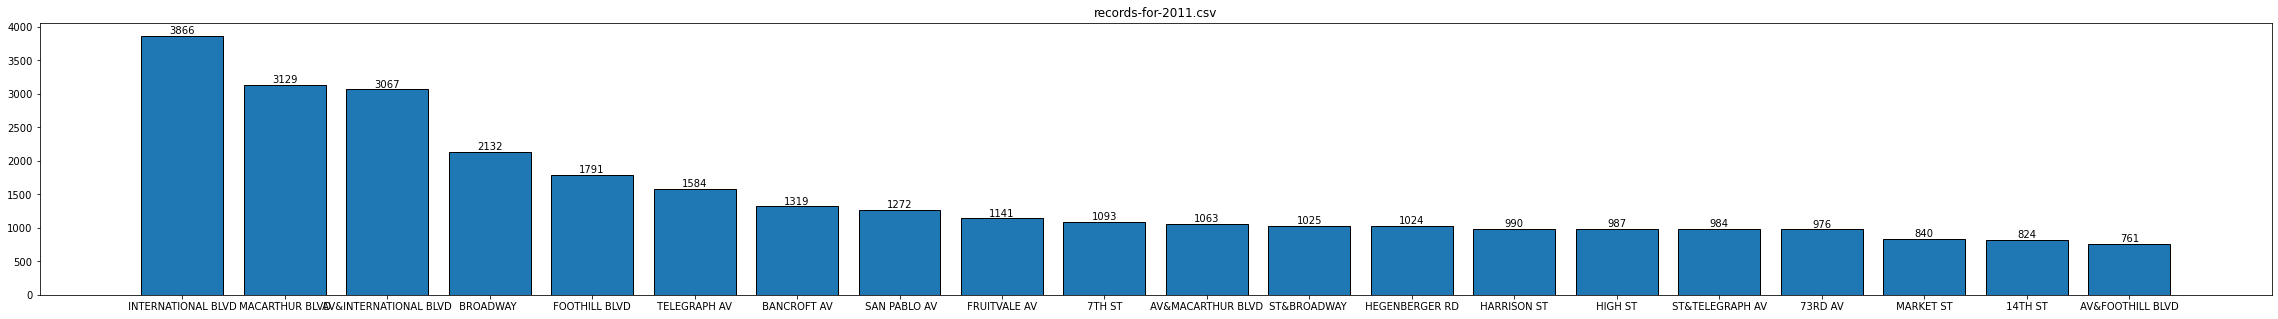

In [146]:
def hist_bar(index, number):
         plt.figure(figsize=(40, 5))
        plt.title(file_path_arr[index])
        X = whole_data[index][attribute].value_counts().index[:number]
        Y = whole_data[index][attribute].value_counts().values[:number]
        plt.bar(X, Y, edgecolor='black')
        for x, y in zip(X, Y):
                plt.text(x, y, '%d' % y, ha='center', va='bottom')

def figure_by_attribute(file_index, attribute):
        print("current file name: ", file_path_arr[file_index])
        current_data = whole_data[file_index]
        bin_data = current_data[attribute].value_counts(dropna = False)
        print(bin_data)
        hist_bar(0, 20)

attribute = attributes[2]
figure_by_attribute(0, attribute)


current file name:  records-for-2012.csv
INTERNATIONAL BLVD        3658
MACARTHUR BLVD            3335
AV&INTERNATIONAL BLVD     3193
BROADWAY                  2167
FOOTHILL BLVD             1649
                          ... 
PLEASANT COLLEGE AV          1
22ND LAKE PARK AV            1
89TH AV&LOGAN ST             1
7TH BOND ST                  1
MORAGA ST&TELEGRAPH AV       1
Name: Location, Length: 35313, dtype: int64


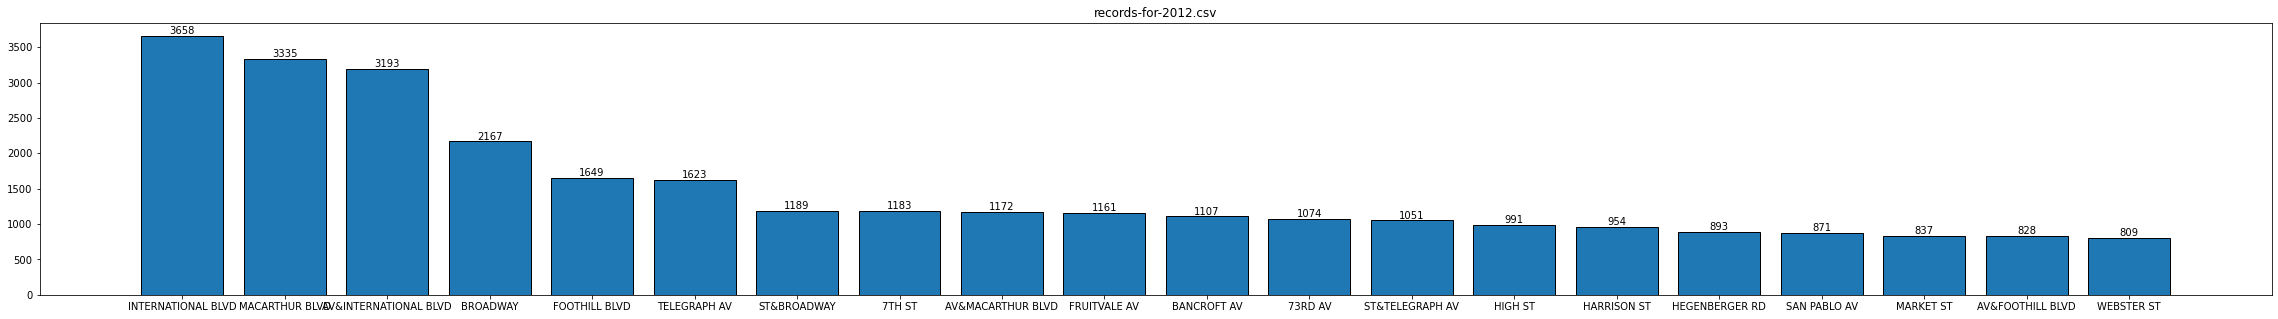

In [116]:
figure_by_attribute(1, attribute)

可以看到，2012、2014年的location数据和其余年份不同，所以需要进行格式化处理：

In [107]:
import re

def reformat_file(file):
    data = pd.read_csv(file, keep_default_na=False, low_memory=False)
    ans = []
    p = r'^.*address": "(.*)", "city"'
    for i in data['Location 1']:
        if i == '':
            ans.append('')
        else:
            ans.append(re.findall(p,i)[0])
    data = data.drop('Location 1',axis=1)
    data['Location'] = ans
    data.to_csv(file, index = False)

In [ ]:
reformat_file(file_path_arr[1])

In [52]:
reformat_file(file_path_arr[3])

current file name:  records-for-2012.csv
INTERNATIONAL BLVD        3658
MACARTHUR BLVD            3335
AV&INTERNATIONAL BLVD     3193
BROADWAY                  2167
FOOTHILL BLVD             1649
                          ... 
PLEASANT COLLEGE AV          1
22ND LAKE PARK AV            1
89TH AV&LOGAN ST             1
7TH BOND ST                  1
MORAGA ST&TELEGRAPH AV       1
Name: Location, Length: 35313, dtype: int64


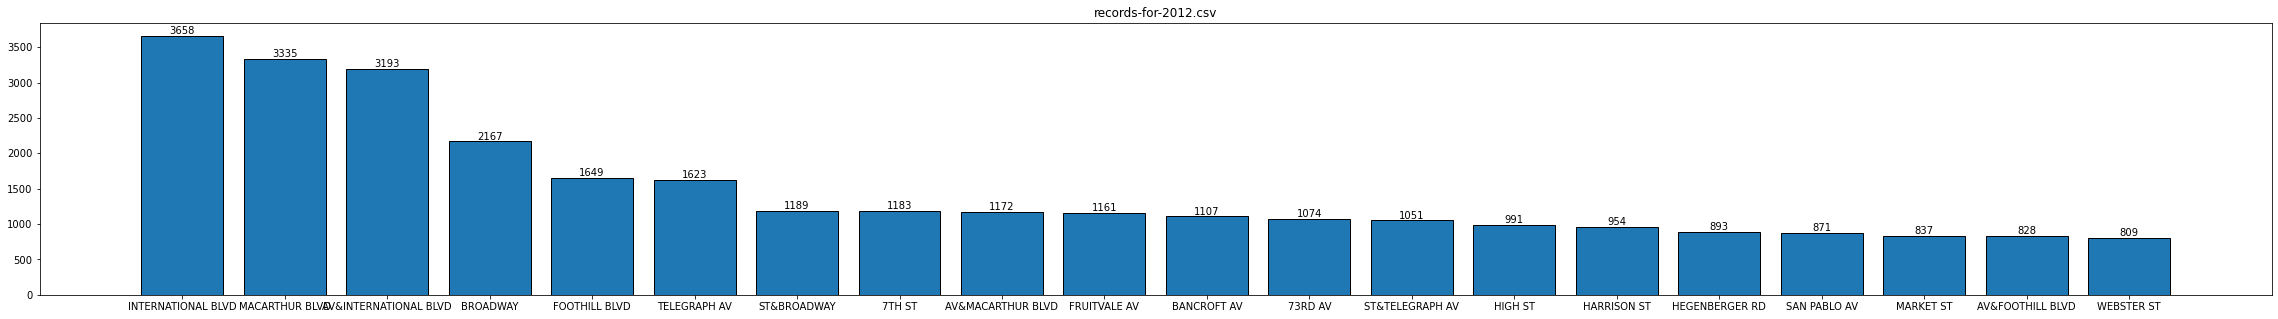

In [115]:
figure_by_attribute(1, attribute)

current file name:  records-for-2014.csv
INTERNATIONAL BLVD            3713
AV&INTERNATIONAL BLVD         3290
MACARTHUR BLVD                2812
BROADWAY                      1996
FOOTHILL BLVD                 1774
                              ... 
27TH LA SALLE AV                 1
E 12TH ST&14TH AV                1
BROADWAY&TAFT LESTER AV          1
CLAREMONT AV&OCEAN VIEW DR       1
46TH 35TH AV                     1
Name: Location, Length: 35132, dtype: int64


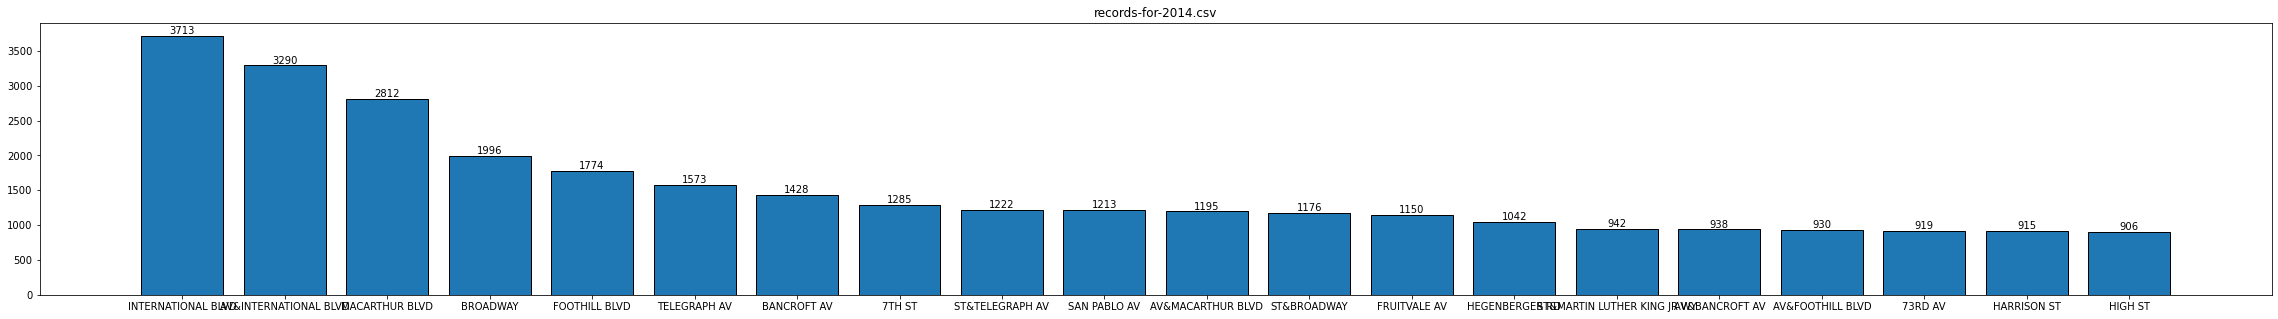

In [112]:
figure_by_attribute(3, attribute)

current file name:  records-for-2015.csv
 INTERNATIONAL BLVD           3695
 AV&INTERNATIONAL BLVD        3106
 MACARTHUR BLVD               3105
 BROADWAY                     2407
 FOOTHILL BLVD                1753
                              ... 
CAMDEN ST                        1
61ST ST&DOVER ST                 1
FRUITVALE ST&OAK ST              1
84TH 46TH AV                     1
 PLEASANT VALLEY                 1
Name: Location, Length: 36515, dtype: int64


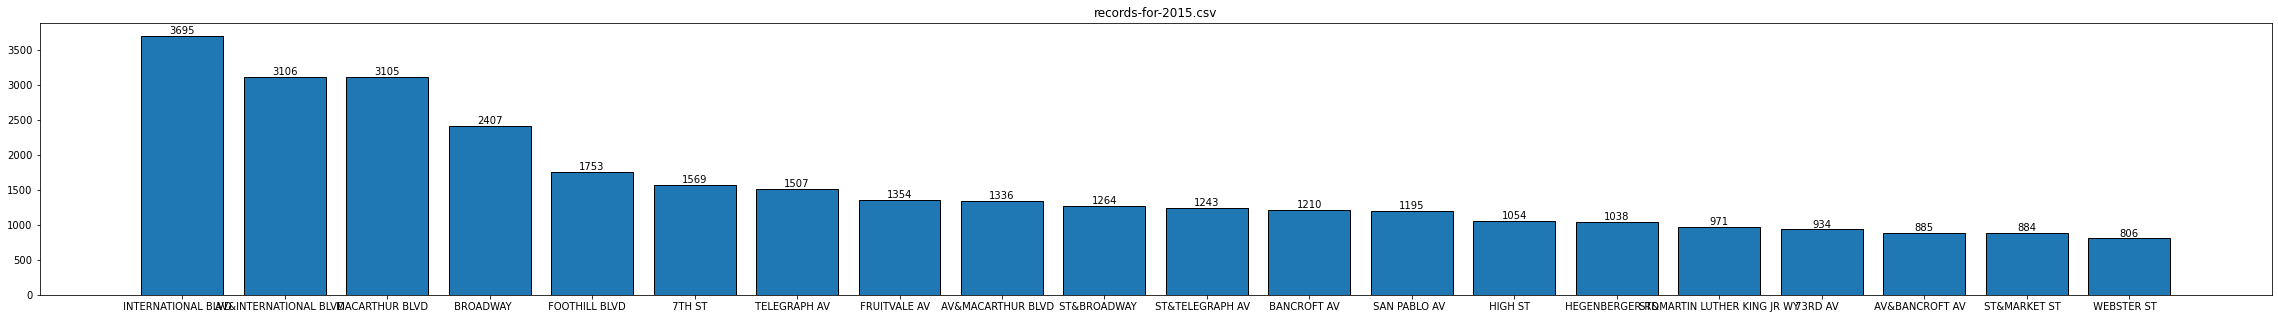

In [80]:
figure_by_attribute(4, attribute)

current file name:  records-for-2016.csv
 INTERNATIONAL BLVD            2156
 AV&INTERNATIONAL BLVD         1829
 MACARTHUR BLVD                1813
 BROADWAY                      1472
 7TH ST                        1223
                               ... 
HIGH SUMMIT ST                    1
BROCKHURST 52ND ST                1
96TH 69TH AV                      1
29TH 34TH AV                      1
FRUITVALE RD&PRESLEY WY           1
Name: Location, Length: 24046, dtype: int64


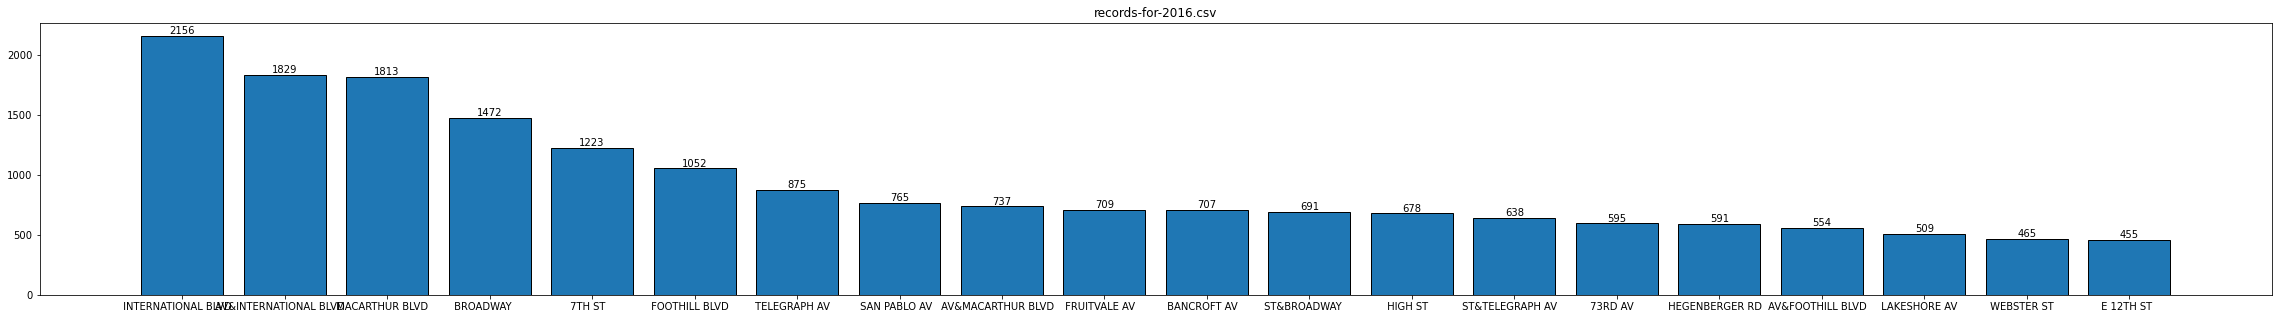

In [81]:
figure_by_attribute(5, attribute)

In [147]:
origin_location_agency = get_data_from_attributes(attribute)
nan_location_by_year = check_nan(origin_location_agency, "")
print(nan_location_by_year)

[0, 61, 0, 3, 0, 0]


2012和2014年的数据出现了缺失值。因为本身该两个年份的属性数据需要进行格式化处理，所以猜想是记录数据时人为设置出错，考虑到location数据和area id以及beat有相关性，因此，考虑综合通过属性的相关关系以及数据对象之间的相似性对缺失值进行补充：
若location和area id、Beat都缺失，那么直接删除该项；若location缺失，但area id或Beat存在，那么就选取存在项对应的属性值中location频次最高的值代替。

In [120]:
attribute = attributes[2]
index_lst,items = get_row_index(file_path_arr[1], attribute, '')

def get_delete_index(items):
    for i in range(len(items)):
        if items[i][2] == '' and items[i][-1] == '':
            delete_lst.append(i)

def delete_row(file, index_lst):
    data = pd.read_csv(file, keep_default_na=False, low_memory=False)
    data = data.drop(index=index_lst)
    data.to_csv(file,index=False)

delete_lst = []
get_delete_index(items)
delete_lst.reverse()
delete_row(file_path_arr[1], [index_lst[x] for x in delete_lst])
for i in delete_lst:
    items.pop(i)
len(items)

for i in delete_lst:
    index_lst.pop(i)

items = np.array(items)
area = items[:,2]
pd.value_counts(area)

def get_max_area_location(file,area_id):
    data = pd.read_csv(file, keep_default_na=False, low_memory=False)
    data = data[data[attributes[3]] == area_id]
    return data[attribute].value_counts().index[0]
L1 = get_max_area_location(file_path_arr[1],'1')
L2 = get_max_area_location(file_path_arr[1],'2')
L1 = pd.DataFrame(34 * [L1])
L2 = pd.DataFrame(27 * [L2])

whole_data = []
for current_file in file_path_arr:
        whole_data.append(pd.read_csv(current_file, keep_default_na=False, low_memory=False))

whole_data[1][attribute] = whole_data[1][whole_data[1] != '']
whole_data[1][attribute] = whole_data[1].append(L1,ignore_index=True)
whole_data[1][attribute] = whole_data[1].append(L2,ignore_index=True)
whole_data[1][attribute] = whole_data[1][attribute]
whole_data[1][attribute].value_counts()

Series([], Name: Location, dtype: int64)

current file name:  records-for-2012.csv
INTERNATIONAL BLVD        3658
MACARTHUR BLVD            3335
AV&INTERNATIONAL BLVD     3193
BROADWAY                  2167
FOOTHILL BLVD             1649
                          ... 
PLEASANT COLLEGE AV          1
22ND LAKE PARK AV            1
89TH AV&LOGAN ST             1
7TH BOND ST                  1
MORAGA ST&TELEGRAPH AV       1
Name: Location, Length: 35313, dtype: int64


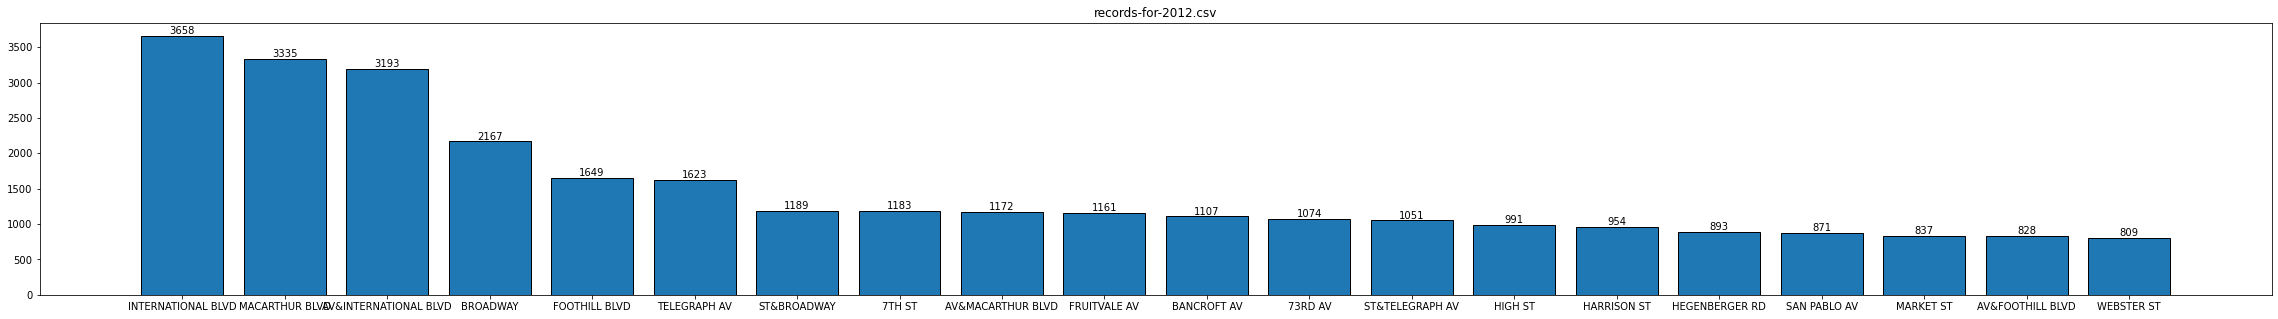

In [123]:
figure_by_attribute(1, attribute)

In [124]:
attribute = attributes[2]
index_lst,items = get_row_index(file_path_arr[3], attribute, '')

def get_delete_index(items):
    for i in range(len(items)):
        if items[i][2] == '' and items[i][-1] == '':
            delete_lst.append(i)

def delete_row(file, index_lst):
    data = pd.read_csv(file, keep_default_na=False, low_memory=False)
    data = data.drop(index=index_lst)
    data.to_csv(file,index=False)

delete_lst = []
get_delete_index(items)
delete_lst.reverse()
delete_row(file_path_arr[3], [index_lst[x] for x in delete_lst])
for i in delete_lst:
    items.pop(i)
len(items)

for i in delete_lst:
    index_lst.pop(i)

items = np.array(items)
area = items[:,2]
pd.value_counts(area)

def get_max_area_location(file,area_id):
    data = pd.read_csv(file, keep_default_na=False, low_memory=False)
    data = data[data[attributes[3]] == area_id]
    return data[attribute].value_counts().index[0]
L2 = get_max_area_location(file_path_arr[3],'2')
L2 = pd.DataFrame(3 * [L2])

whole_data = []
for current_file in file_path_arr:
        whole_data.append(pd.read_csv(current_file, keep_default_na=False, low_memory=False))

whole_data[3][attribute] = whole_data[3][whole_data[3] != '']
whole_data[3][attribute] = whole_data[3].append(L2,ignore_index=True)
whole_data[3][attribute] = whole_data[3][attribute]
whole_data[0][attribute].value_counts()

 INTERNATIONAL BLVD        3866
 MACARTHUR BLVD            3129
 AV&INTERNATIONAL BLVD     3067
 BROADWAY                  2132
 FOOTHILL BLVD             1791
                           ... 
33RD E 17TH ST                1
 - 6400 BLK                   1
73RD PALM AV                  1
21ST EMBARCADERO              1
95TH 2ND AV                   1
Name: Location, Length: 32505, dtype: int64

current file name:  records-for-2014.csv
INTERNATIONAL BLVD         3713
AV&INTERNATIONAL BLVD      3290
MACARTHUR BLVD             2812
BROADWAY                   1996
FOOTHILL BLVD              1774
                           ... 
104TH E 15TH ST               1
27TH LA SALLE AV              1
E 12TH ST&14TH AV             1
BROADWAY&TAFT LESTER AV       1
SAN POPLAR ST                 1
Name: Location, Length: 35132, dtype: int64


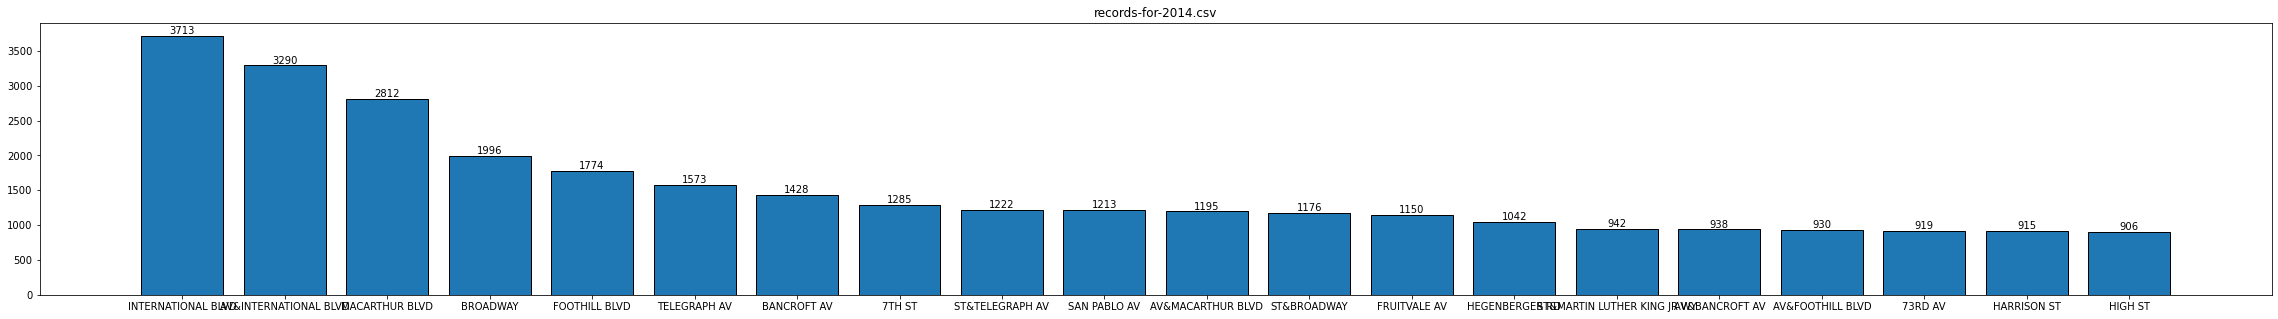

In [127]:
figure_by_attribute(3, attribute)

### 4.Priority的处理，为标称属性。
在一系列的处理后，已经没有缺失值。

current file name:  records-for-2011.csv
2    143314
1     36699
0         2
Name: Priority, dtype: int64


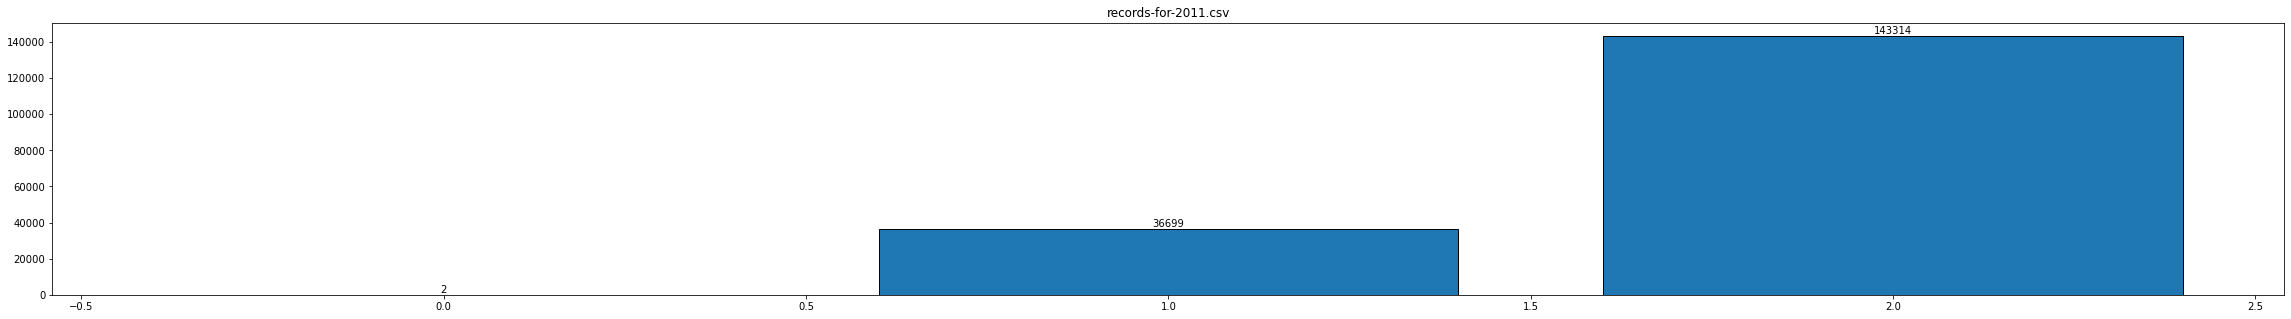

In [148]:
attribute = attributes[5]
figure_by_attribute(0, attribute)

current file name:  records-for-2012.csv
2    145498
1     41924
Name: Priority, dtype: int64


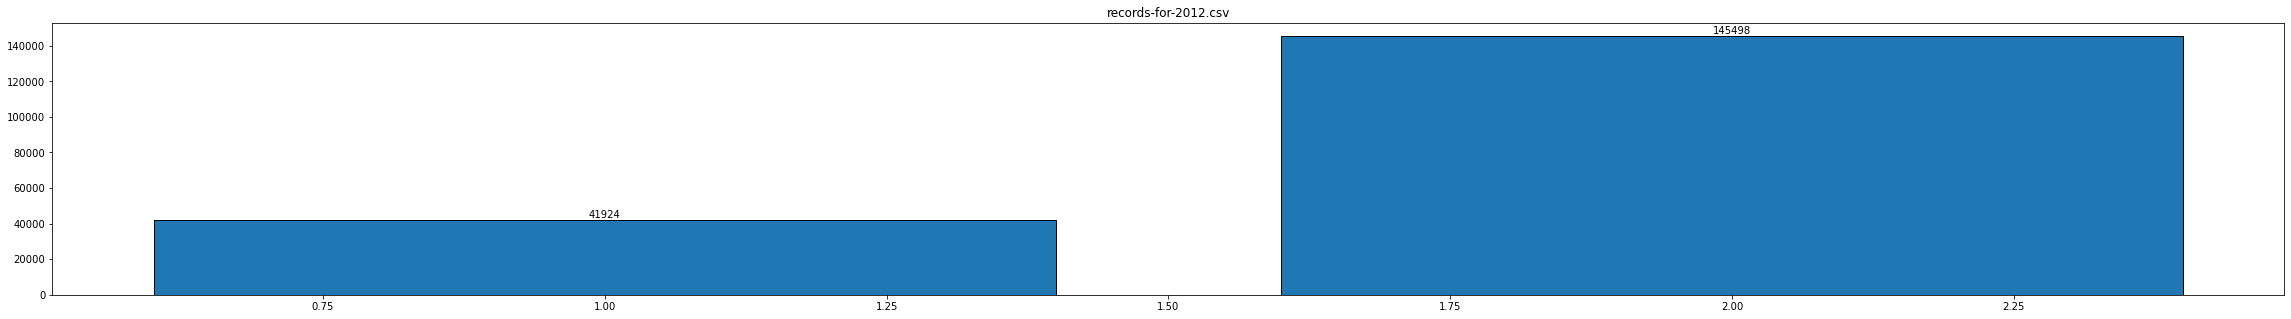

In [131]:
figure_by_attribute(1, attribute)

current file name:  records-for-2013.csv
2    144859
1     43171
0        21
Name: Priority, dtype: int64


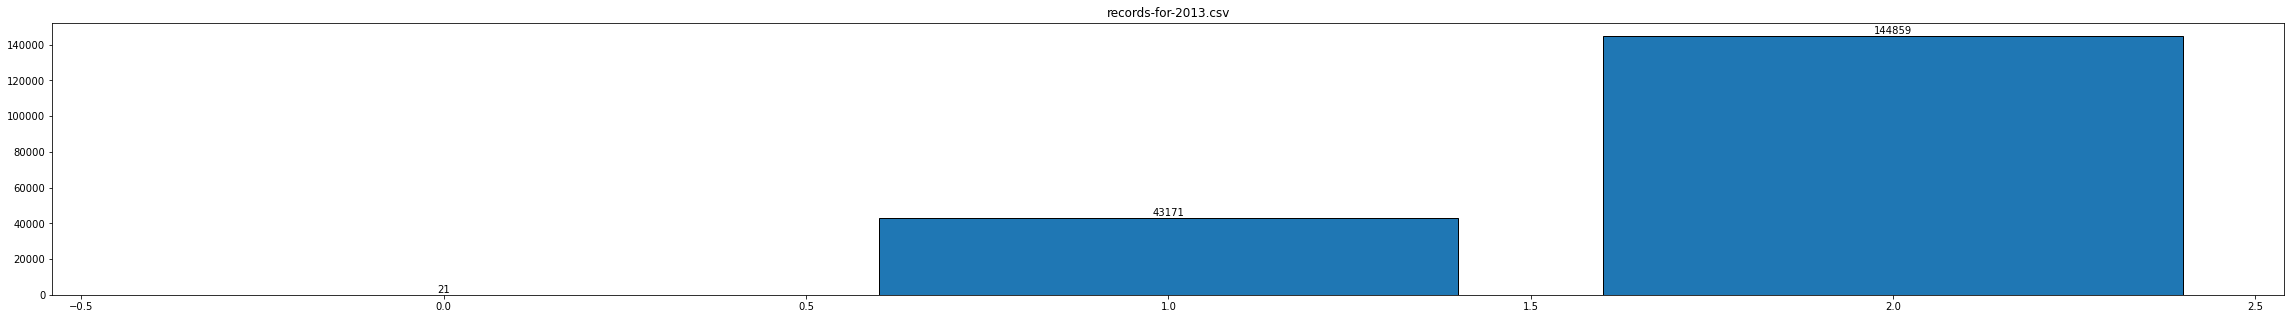

In [132]:
figure_by_attribute(2, attribute)

current file name:  records-for-2014.csv
2    144678
1     42763
Name: Priority, dtype: int64


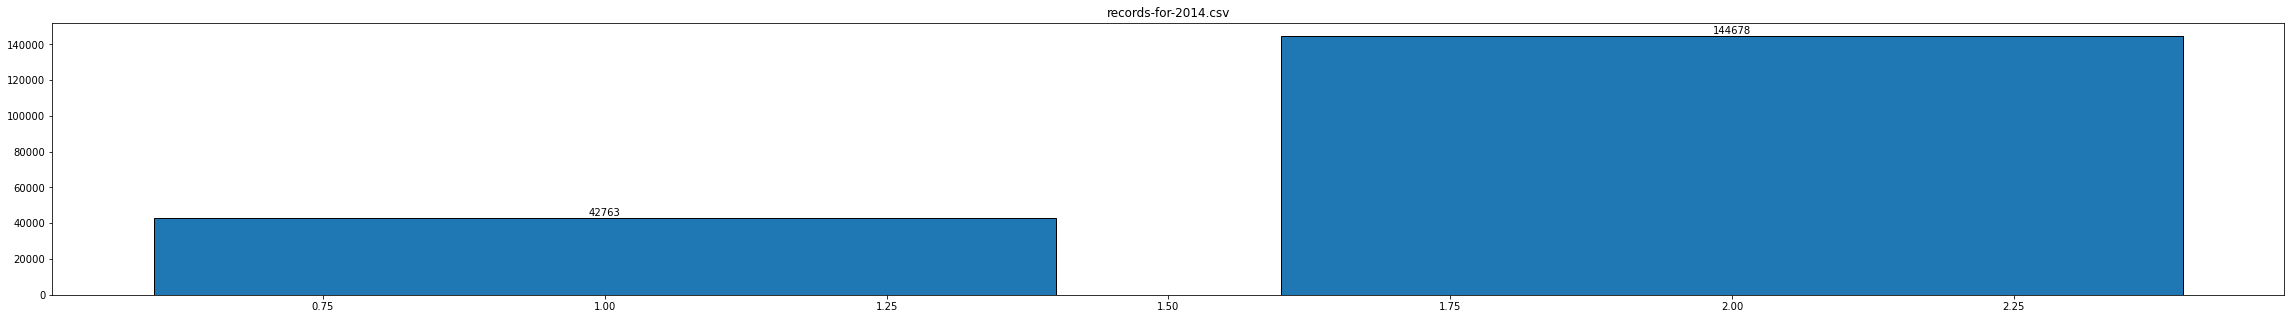

In [133]:
figure_by_attribute(3, attribute)

current file name:  records-for-2015.csv
2    150162
1     42418
0         1
Name: Priority, dtype: int64


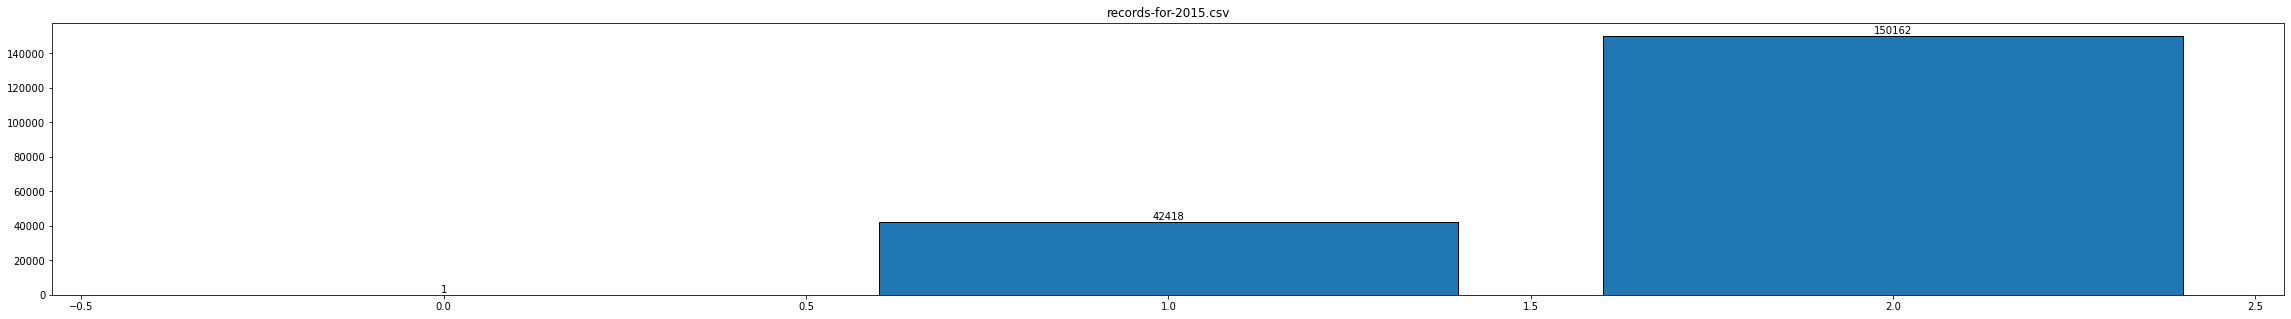

In [134]:
figure_by_attribute(4, attribute)

current file name:  records-for-2016.csv
2    86272
1    24555
Name: Priority, dtype: int64


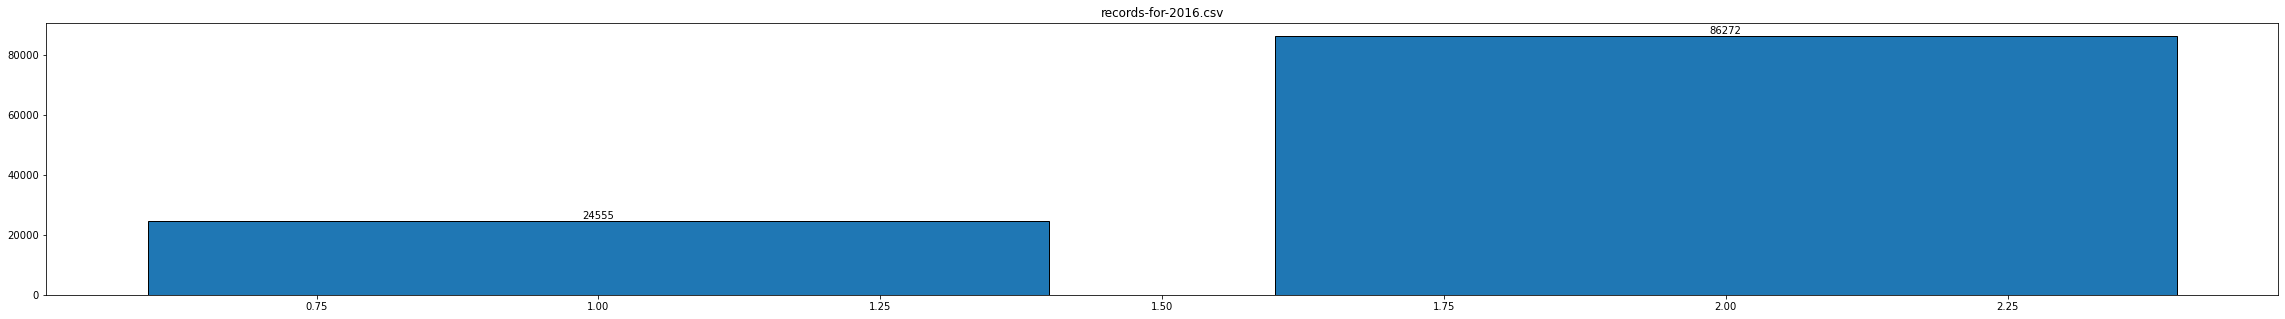

In [135]:
figure_by_attribute(5, attribute)

从以上的直方图难以确定是否有离群点。

### 5 Incident Type ID的处理，为标称属性

In [136]:
origin_incident_type_id = get_data_from_attributes(attributes[6])
nan_incident_type_id_by_year = check_nan(origin_incident_type_id, "")
print(nan_incident_type_id_by_year)

[0, 0, 0, 0, 0, 0]


可以看到该属性没有缺失值，输出频数直方图查看：

current file name:  records-for-2016.csv
933R      10094
415        7883
SECCK      7251
10851      5308
911H       5089
          ...  
EBMUD         1
300WI         1
3211H         1
DROWN         1
YELALT        1
Name: Incident Type Id, Length: 242, dtype: int64


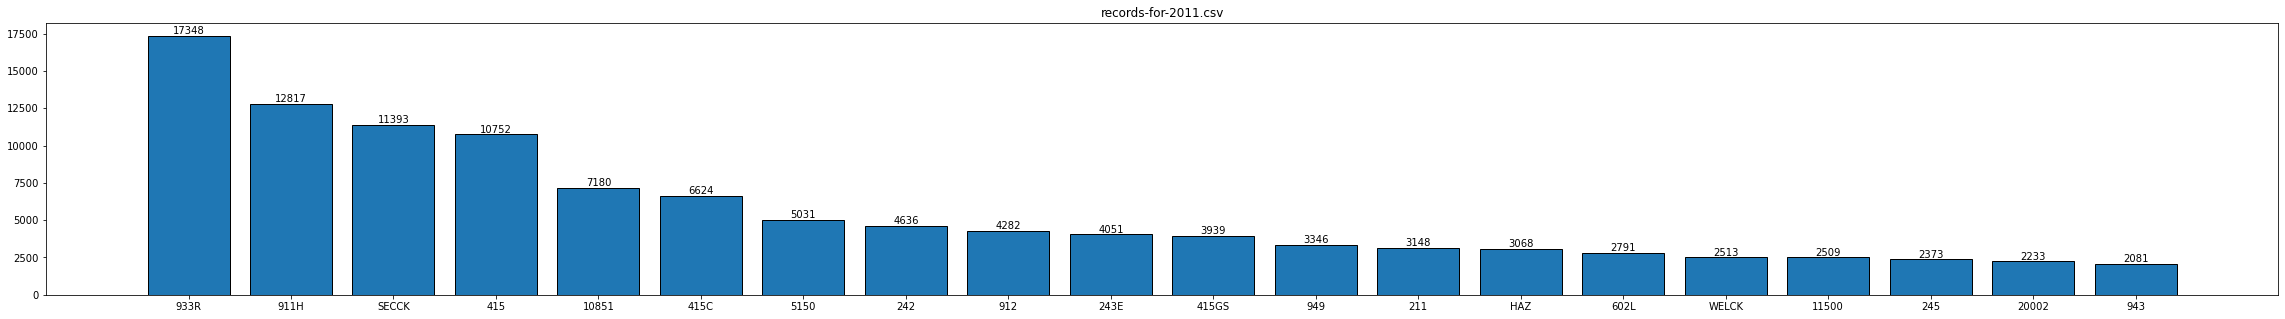

In [149]:
attribute = attributes[6]
figure_by_attribute(5, attribute)

current file name:  records-for-2013.csv
933R      17859
SECCK     12240
415       11313
10851      9469
911H       8268
          ...  
243A          1
ESCAPE        1
290           1
626_9         1
243B          1
Name: Incident Type Id, Length: 253, dtype: int64


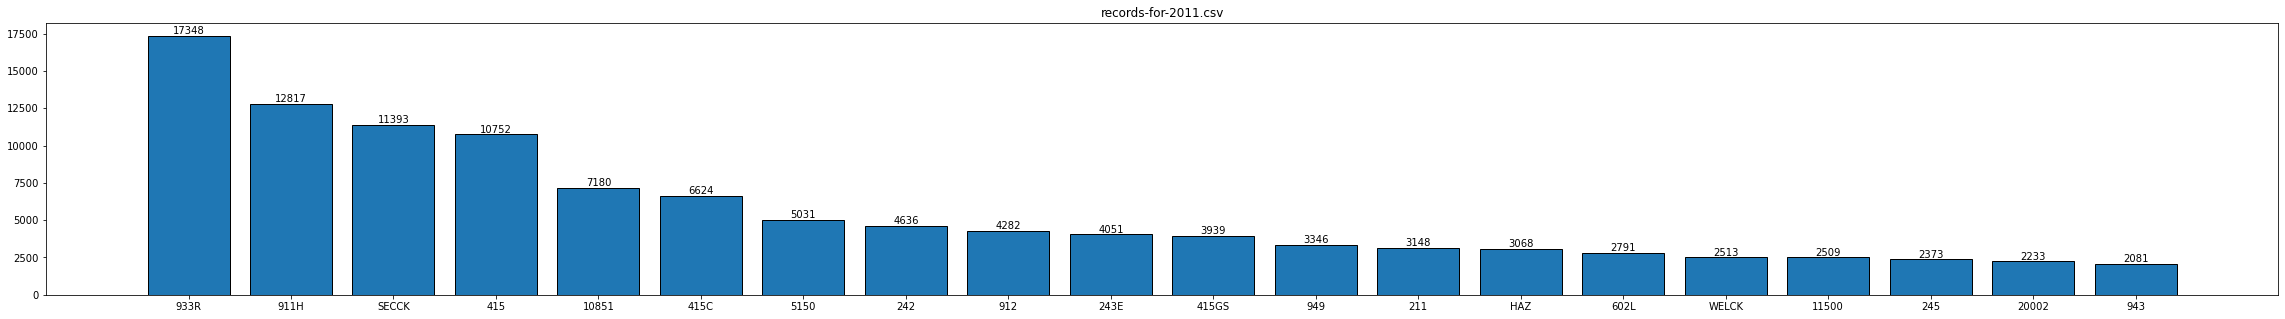

In [150]:
figure_by_attribute(2, attribute)

current file name:  records-for-2014.csv
933R     17799
SECCK    13778
415      11936
911H      9647
10851     8894
         ...  
484E         1
290          1
A487         1
524          1
270C         1
Name: Incident Type Id, Length: 257, dtype: int64


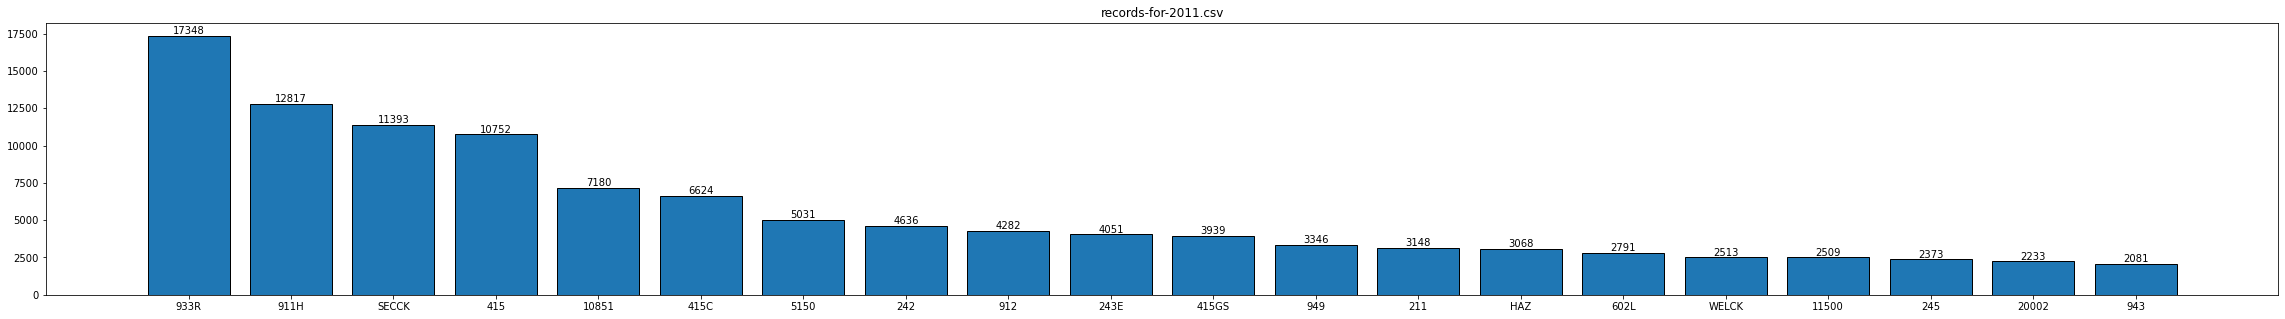

In [151]:
figure_by_attribute(3, attribute)

current file name:  records-for-2015.csv
933R      18181
SECCK     14809
415       13677
10851      8899
911H       8529
          ...  
182           1
243B          1
REDALT        1
484E          1
FLOOD         1
Name: Incident Type Id, Length: 259, dtype: int64


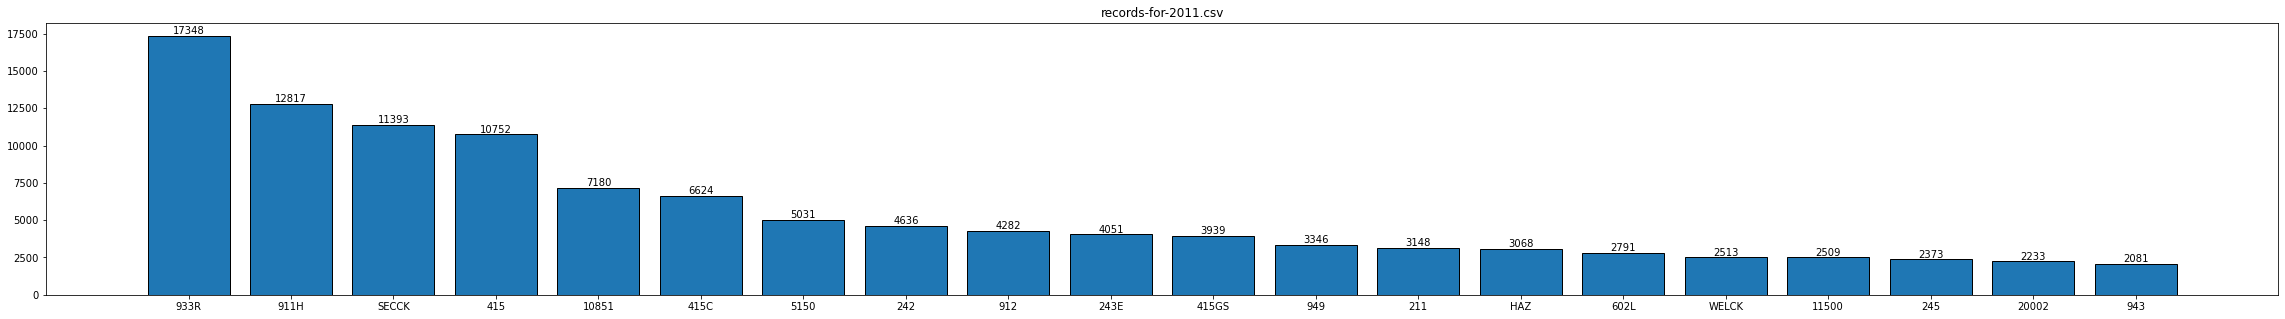

In [152]:
figure_by_attribute(4, attribute)

current file name:  records-for-2016.csv
933R      10094
415        7883
SECCK      7251
10851      5308
911H       5089
          ...  
EBMUD         1
300WI         1
3211H         1
DROWN         1
YELALT        1
Name: Incident Type Id, Length: 242, dtype: int64


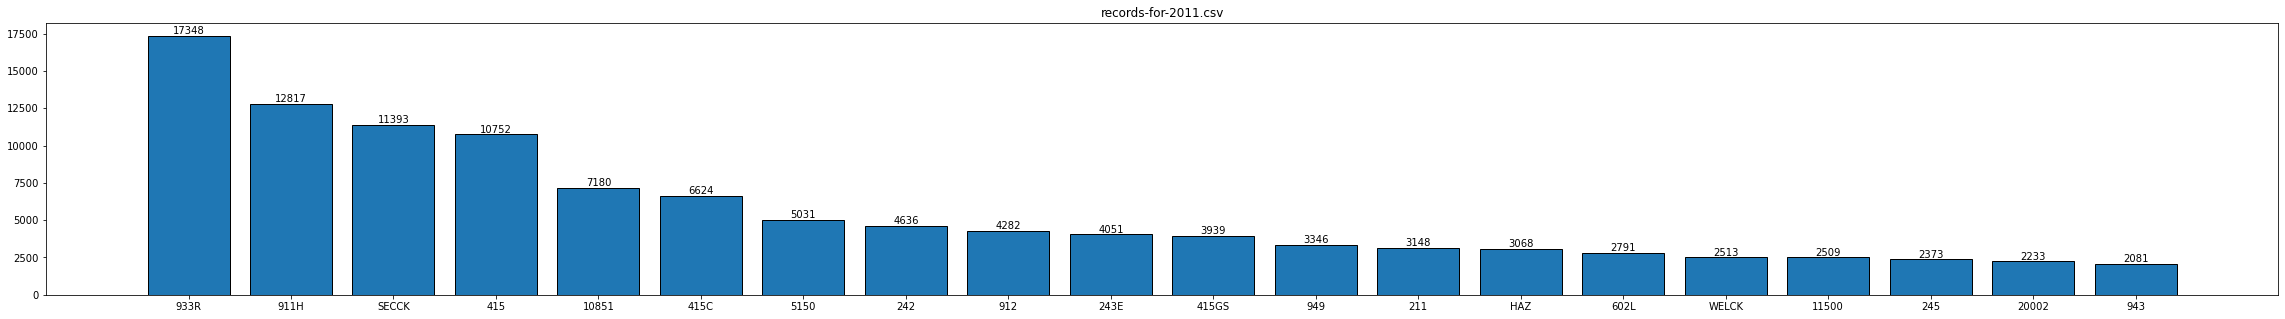

In [153]:
figure_by_attribute(5, attribute)

### 6 Incident Type Description的处理，为标称属性

In [184]:
attribute = attributes[7]
origin_incident_type_description = get_data_from_attributes(attribute)
nan_incident_type_description_by_year = check_nan(origin_incident_type_description, "")
print(nan_incident_type_description_by_year)

[0, 0, 4, 141, 243, 0]


current file name:  records-for-2011.csv
ALARM-RINGER            17348
911 HANG-UP             12817
SECURITY CHECK          11393
STOLEN VEHICLE           7180
415 UNKNOWN              6624
                        ...  
TICKET SCALPING             1
AGGRAVATED ASSAULT O        1
THREATEN WITNESS/VIC        1
INJURE TELEPHONE/POW        1
OBSTRUCTING JUSTICE-        1
Name: Incident Type Description, Length: 265, dtype: int64


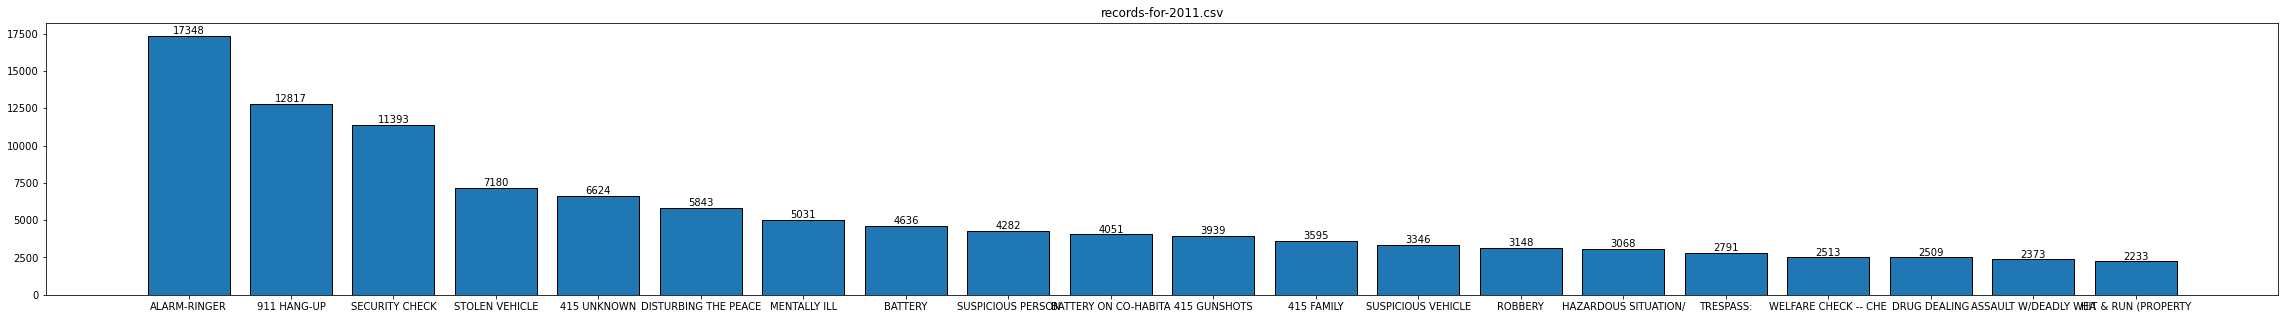

In [156]:
figure_by_attribute(0, attribute)

current file name:  records-for-2012.csv
ALARM-RINGER            17216
SECURITY CHECK          11488
911 HANG-UP             10585
STOLEN VEHICLE           8208
415 UNKNOWN              6081
                        ...  
PROTECTIVE CUSTODY-N        1
EMBEZZLEMENT BY AN E        1
ESCAPE DETENTION            1
VIN VERIFICATION            1
INCEST                      1
Name: Incident Type Description, Length: 258, dtype: int64


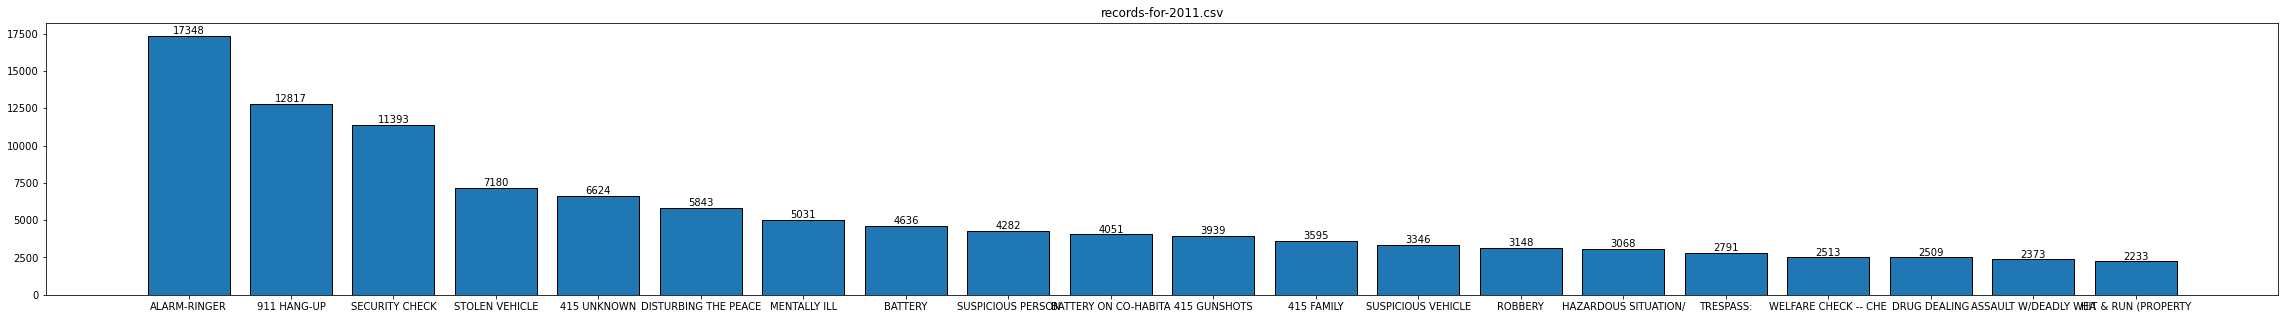

In [157]:
figure_by_attribute(1, attribute)

current file name:  records-for-2013.csv
ALARM-RINGER            17859
SECURITY CHECK          12240
STOLEN VEHICLE           9469
911 HANG-UP              8268
DISTURBING THE PEACE     6553
                        ...  
LOST PROPERY                1
POSSESS WEAPON AT SC        1
ASSAULT ON A POLICE         1
MAINTAINING PUBLIC N        1
KIDNAPPING FOR RANSO        1
Name: Incident Type Description, Length: 255, dtype: int64


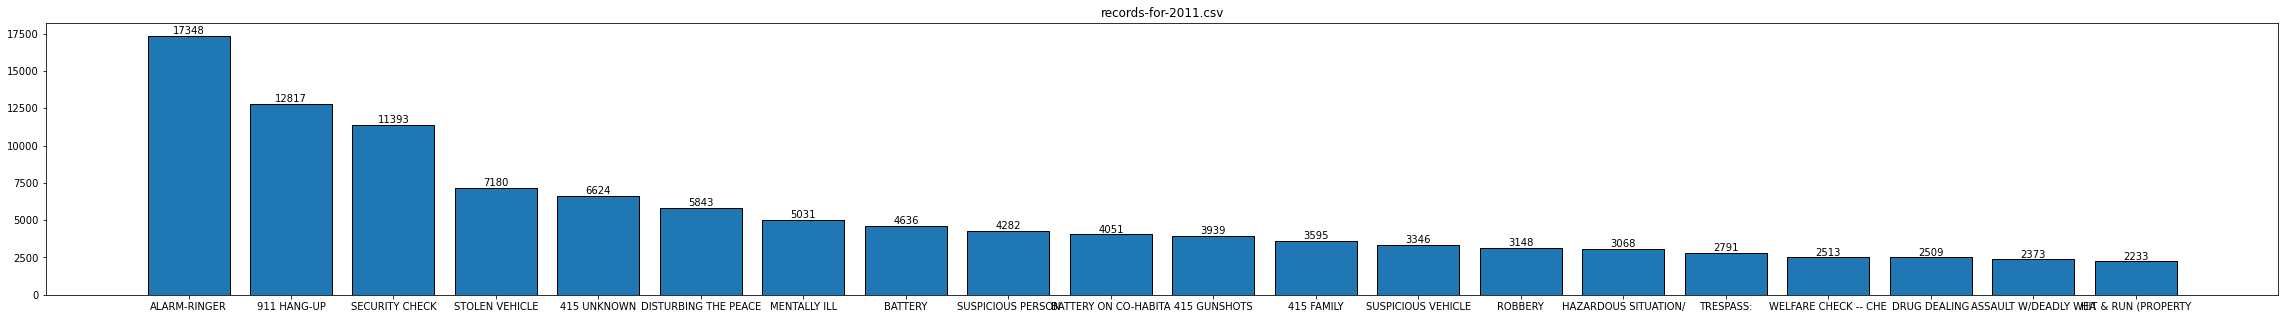

In [158]:
figure_by_attribute(2, attribute)

current file name:  records-for-2014.csv
ALARM-RINGER            17799
SECURITY CHECK          13778
911 HANG-UP              9647
STOLEN VEHICLE           8894
MENTALLY ILL             7001
                        ...  
FALSE REPORT OF CRIM        1
NONSTUDENT REFUSE TO        1
INSFRASTRUCTURE SECU        1
YELLOW ALERT AT THE         1
VIOLATION OF PAROLE:        1
Name: Incident Type Description, Length: 258, dtype: int64


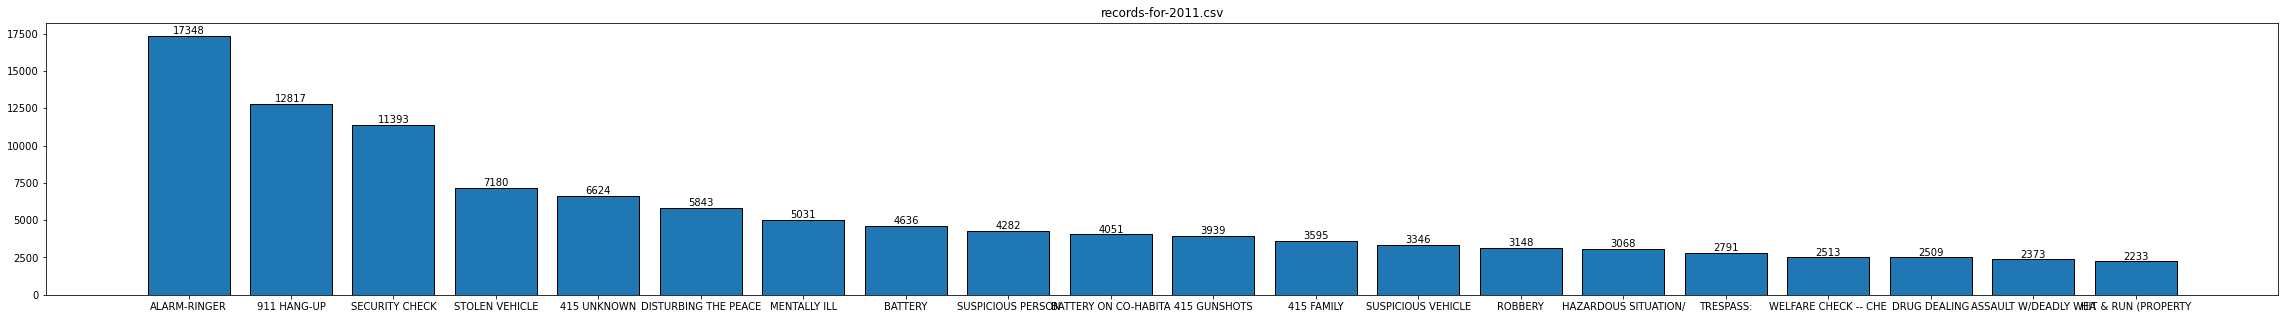

In [159]:
figure_by_attribute(3, attribute)

current file name:  records-for-2015.csv
ALARM-RINGER            18181
SECURITY CHECK          14809
STOLEN VEHICLE           8899
911 HANG-UP              8529
MENTALLY ILL             8465
                        ...  
VICE                        1
IDENTITY THEFT              1
PHONE RPT                   1
RED ALERT-AIRPLANE I        1
EXTORTION                   1
Name: Incident Type Description, Length: 262, dtype: int64


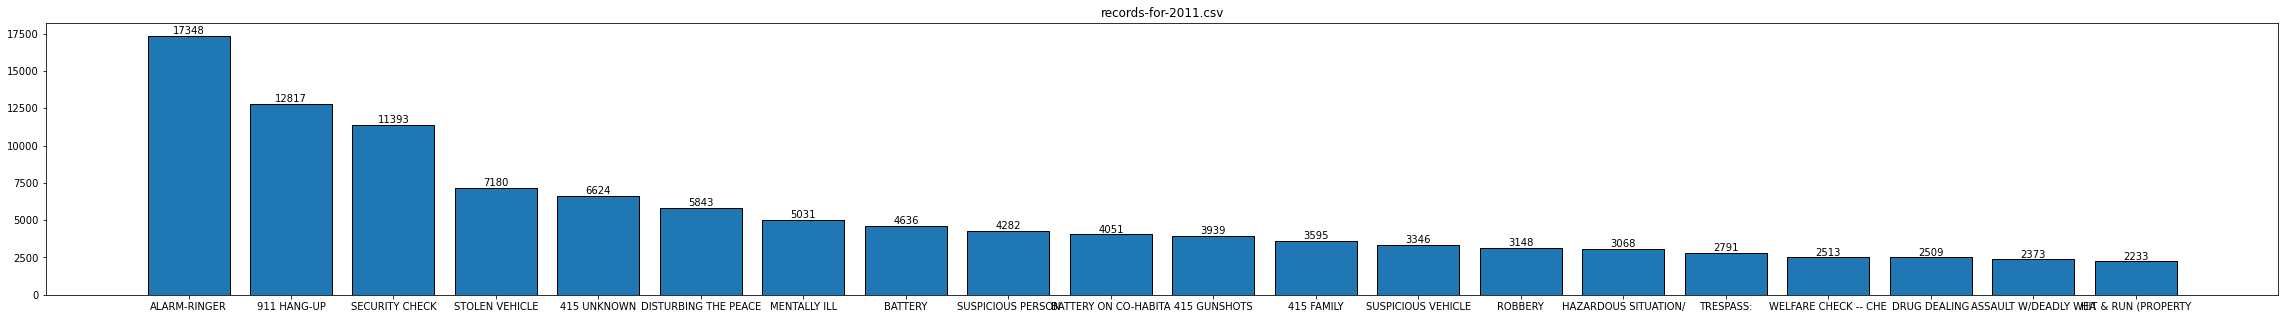

In [160]:
figure_by_attribute(4, attribute)

current file name:  records-for-2016.csv
ALARM-RINGER            10094
SECURITY CHECK           7251
STOLEN VEHICLE           5308
911 HANG-UP              5089
MENTALLY ILL             4859
                        ...  
ATTEMPTED GRAND THEF        1
EASTBAY MUD                 1
BARKING DOG                 1
OAKLAND TRAFFIC CODE        1
7 DIGIT EMERGENCY LI        1
Name: Incident Type Description, Length: 245, dtype: int64


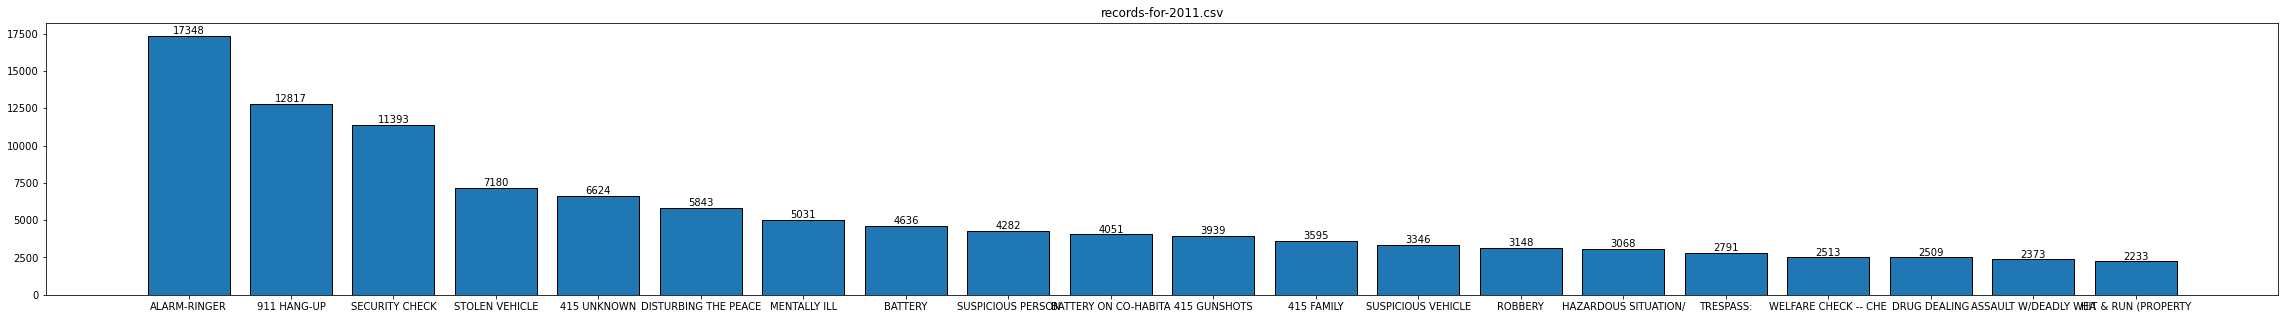

In [161]:
figure_by_attribute(5, attribute)

经过观察，Incident Type Description和Incident Type ID具有对应性，所以直接通过属性的相关关系，将已有的对应关系填入缺失值的部分即可。

In [197]:
def check_null(file):
    data = pd.read_csv(file, keep_default_na=False, low_memory=False)
    index0 = data[data[attribute] == ''].index
    print(index0)
    for i in index0:
        print(data.loc[i, attributes[6]])

In [198]:
check_null(file_path_arr[2])

Int64Index([178947, 185820, 186584, 187409], dtype='int64')
JGP
JGP
JGP
JGP


In [199]:
check_null(file_path_arr[3])

Int64Index([  2382,  11135,  13171,  18599,  37660,  40807,  43471,  47091,
             47904,  51915,
            ...
            177699, 178248, 178298, 181062, 181541, 182385, 183061, 184096,
            186541, 187284],
           dtype='int64', length=141)
JGP
JGP
JGP
JGP
JGP
JGP
JGP
JGP
JGP
JGP
JGP
JGP
JGP
JGP
JGP
JGP
JGP
JGP
JGP
JGP
JGP
JGP
JGP
JGP
JGP
JGP
JGP
JGP
JGP
JGP
JGP
JGP
JGP
JGP
JGP
JGP
JGP
JGP
JGP
JGP
JGP
JGP
JGP
JGP
JGP
JGP
JGP
JGP
JGP
JGP
JGP
JGP
JGP
JGP
JGP
JGP
JGP
JGP
JGP
JGP
JGP
JGP
JGP
JGP
JGP
JGP
JGP
JGP
JGP
JGP
JGP
JGP
JGP
JGP
JGP
JGP
JGP
JGP
JGP
JGP
JGP
JGP
JGP
JGP
JGP
JGP
JGP
JGP
JGP
JGP
JGP
JGP
JGP
JGP
JGP
JGP
JGP
JGP
JGP
JGP
JGP
JGP
JGP
JGP
JGP
JGP
JGP
JGP
JGP
JGP
JGP
JGP
JGP
JGP
JGP
JGP
JGP
JGP
JGP
JGP
JGP
JGP
JGP
JGP
JGP
JGP
JGP
JGP
JGP
JGP
JGP
JGP
JGP
JGP
JGP
JGP
JGP
JGP
JGP
JGP
JGP


可以看到，当Incident Type Description为空值，其对应的ID为JGP，而数据集并没有相关定义，因此将JGP直接填入Incident Type Description。

In [200]:
def fill_ITD(file):
    data = pd.read_csv(file, keep_default_na=False, low_memory=False)
    index0 = data[data[attribute] == ''].index
    print(index0)
    for i in index0:
        data.loc[i, attribute] = data.loc[i, attributes[6]]
    data.to_csv(file,index = False)

In [202]:
fill_ITD(file_path_arr[1])
fill_ITD(file_path_arr[2])
fill_ITD(file_path_arr[3])

Int64Index([], dtype='int64')
Int64Index([178947, 185820, 186584, 187409], dtype='int64')
Int64Index([  2382,  11135,  13171,  18599,  37660,  40807,  43471,  47091,
             47904,  51915,
            ...
            177699, 178248, 178298, 181062, 181541, 182385, 183061, 184096,
            186541, 187284],
           dtype='int64', length=141)


查看填充后的频数直方图：

current file name:  records-for-2012.csv
ALARM-RINGER            17216
SECURITY CHECK          11488
911 HANG-UP             10585
STOLEN VEHICLE           8208
415 UNKNOWN              6081
                        ...  
PROTECTIVE CUSTODY-N        1
EMBEZZLEMENT BY AN E        1
ESCAPE DETENTION            1
VIN VERIFICATION            1
INCEST                      1
Name: Incident Type Description, Length: 258, dtype: int64


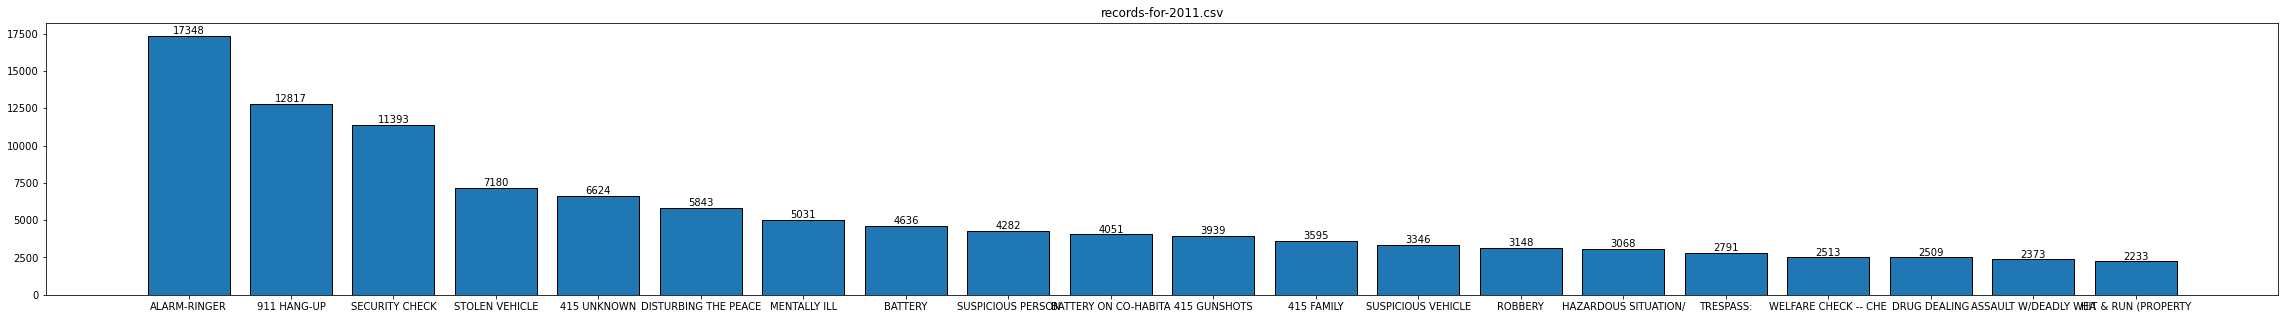

In [203]:
figure_by_attribute(1, attribute)

current file name:  records-for-2013.csv
ALARM-RINGER            17859
SECURITY CHECK          12240
STOLEN VEHICLE           9469
911 HANG-UP              8268
DISTURBING THE PEACE     6553
                        ...  
LOST PROPERY                1
POSSESS WEAPON AT SC        1
ASSAULT ON A POLICE         1
MAINTAINING PUBLIC N        1
KIDNAPPING FOR RANSO        1
Name: Incident Type Description, Length: 255, dtype: int64


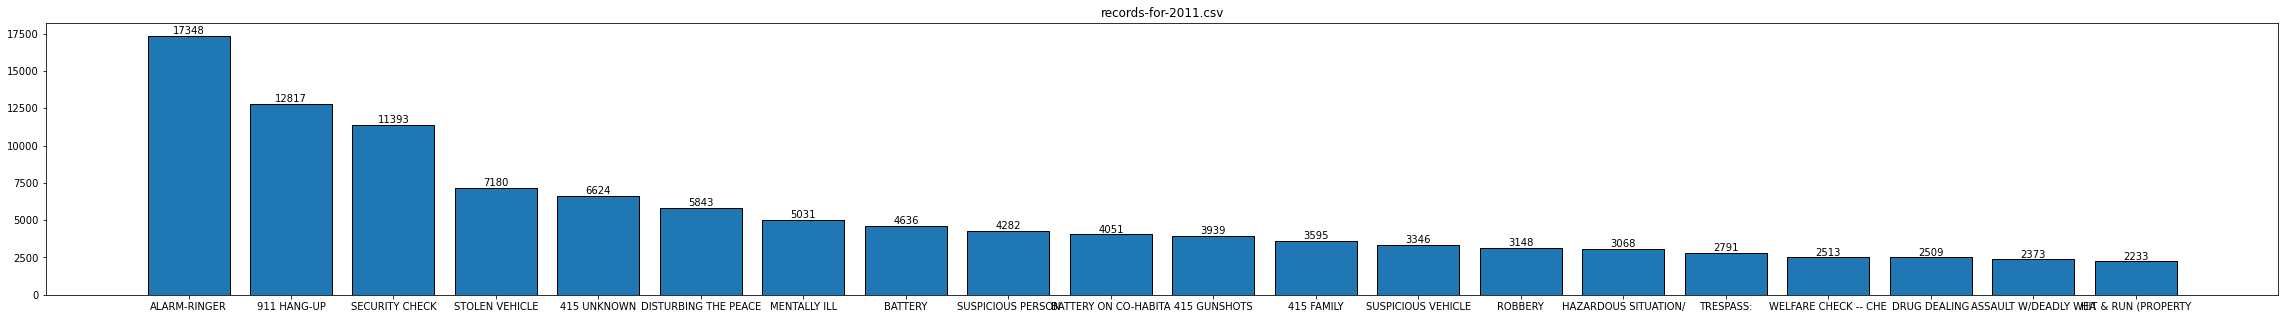

In [204]:
figure_by_attribute(2, attribute)

current file name:  records-for-2014.csv
ALARM-RINGER            17799
SECURITY CHECK          13778
911 HANG-UP              9647
STOLEN VEHICLE           8894
MENTALLY ILL             7001
                        ...  
FALSE REPORT OF CRIM        1
NONSTUDENT REFUSE TO        1
INSFRASTRUCTURE SECU        1
YELLOW ALERT AT THE         1
VIOLATION OF PAROLE:        1
Name: Incident Type Description, Length: 258, dtype: int64


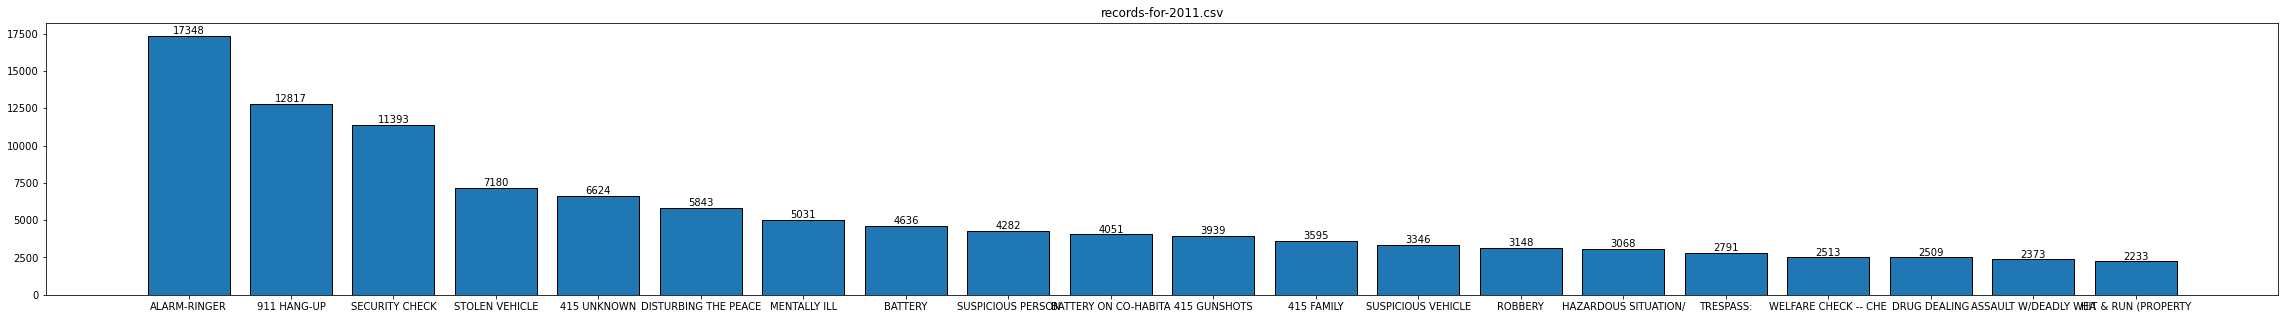

In [205]:
figure_by_attribute(3, attribute)

### 7 Event Number的处理，为标称属性
具有唯一性，不在此讨论。